In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
from sklearn.preprocessing import OrdinalEncoder


import missingno as msno


from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_duplicate_features


In [4]:
pd.set_option("display.max_columns",500) 
pd.set_option("display.max_rows",500) 
pd.options.display.float_format = '{:.2f}'.format

In [6]:
data_df = pd.read_csv('train (6).csv')
result_df = pd.read_csv('train_churn_labels.csv')

In [7]:
df = pd.concat([data_df,result_df],axis = 1)

In [8]:
df.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,Var41,Var42,Var43,Var44,Var45,Var46,Var47,Var48,Var49,Var50,Var51,Var52,Var53,Var54,Var55,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66,Var67,Var68,Var69,Var70,Var71,Var72,Var73,Var74,Var75,Var76,Var77,Var78,Var79,Var80,Var81,Var82,Var83,Var84,Var85,Var86,Var87,Var88,Var89,Var90,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100,Var101,Var102,Var103,Var104,Var105,Var106,Var107,Var108,Var109,Var110,Var111,Var112,Var113,Var114,Var115,Var116,Var117,Var118,Var119,Var120,Var121,Var122,Var123,Var124,Var125,Var126,Var127,Var128,Var129,Var130,Var131,Var132,Var133,Var134,Var135,Var136,Var137,Var138,Var139,Var140,Var141,Var142,Var143,Var144,Var145,Var146,Var147,Var148,Var149,Var150,Var151,Var152,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163,Var164,Var165,Var166,Var167,Var168,Var169,Var170,Var171,Var172,Var173,Var174,Var175,Var176,Var177,Var178,Var179,Var180,Var181,Var182,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var209,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,Label
0,NaN,NaN,NaN,NaN,NaN,1526.00,7.00,NaN,NaN,NaN,NaN,NaN,184.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464.00,580.00,NaN,14.00,128.00,NaN,NaN,166.56,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,3570.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,35.00,NaN,1350864.00,NaN,0.00,NaN,NaN,7333.11,NaN,5.00,NaN,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.00,NaN,NaN,168.00,117625.60,NaN,NaN,NaN,NaN,NaN,1175.00,NaN,NaN,NaN,6.00,NaN,720.00,8.00,NaN,NaN,NaN,NaN,NaN,0.00,1212385.00,69134.00,NaN,NaN,NaN,NaN,NaN,185.00,NaN,NaN,0.00,9.00,NaN,NaN,NaN,NaN,397579.00,NaN,NaN,NaN,1812252.00,NaN,NaN,NaN,NaN,NaN,NaN,142.00,NaN,NaN,38418.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,462.00,NaN,NaN,bZkvyxLkBI,RO12,NaN,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,NaN,NaN,dXGu,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,NaN,uKAI,L84s,XfqtO3UdzaXh_,NaN,NaN,NaN,XTbPUYD,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,525.00,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.00,210.00,NaN,2.00,24.00,NaN,NaN,353.52,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,4764966.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.00,NaN,NaN,NaN,NaN,NaN,NaN,3.00,26,0.00,NaN,2872928.00,NaN,3.00,NaN,NaN,151098.90,NaN,25.00,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58158.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.00,NaN,NaN,40.00,-356411.60,NaN,NaN,NaN,NaN,NaN,590.00,NaN,NaN,NaN,72.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,8.00,4136430.00,357038.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.00,9.00,NaN,NaN,NaN,NaN,278334.00,NaN,NaN,NaN,10439160.00,NaN,NaN,NaN,NaN,NaN,NaN,32.00,NaN,NaN,238572.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CEat0G8rTN,RO12,NaN,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,NaN,NaN,lg1t,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,kIsH,NaN,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,kZJyVg2,NaN,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,5236.00,7.00,NaN,NaN,NaN,NaN,NaN,904.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1212.00,1515.00,NaN,26.00,816.00,NaN,NaN,220.08,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,5883894.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.60

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 231 entries, Var1 to Label
dtypes: float64(191), int64(2), object(38)
memory usage: 88.1+ MB


In [8]:
df.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,Var41,Var42,Var43,Var44,Var45,Var46,Var47,Var48,Var49,Var50,Var51,Var52,Var53,Var54,Var55,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66,Var67,Var68,Var69,Var70,Var71,Var72,Var73,Var74,Var75,Var76,Var77,Var78,Var79,Var80,Var81,Var82,Var83,Var84,Var85,Var86,Var87,Var88,Var89,Var90,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100,Var101,Var102,Var103,Var104,Var105,Var106,Var107,Var108,Var109,Var110,Var111,Var112,Var113,Var114,Var115,Var116,Var117,Var118,Var119,Var120,Var121,Var122,Var123,Var124,Var125,Var126,Var127,Var128,Var129,Var130,Var131,Var132,Var133,Var134,Var135,Var136,Var137,Var138,Var139,Var140,Var141,Var142,Var143,Var144,Var145,Var146,Var147,Var148,Var149,Var150,Var151,Var152,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163,Var164,Var165,Var166,Var167,Var168,Var169,Var170,Var171,Var172,Var173,Var174,Var175,Var176,Var177,Var178,Var179,Var180,Var181,Var182,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230,Label
count,702.00,1241.00,1240.00,1579.00,1487.00,44471.00,44461.00,0.00,702.00,1487.00,1240.00,558.00,44461.00,1240.00,0.00,1487.00,1579.00,1579.00,1579.00,0.00,44471.00,44991.00,1487.00,42770.00,44991.00,1487.00,1487.00,44989.00,702.00,702.00,0.00,0.00,847.00,1241.00,44991.00,1241.00,1579.00,44991.00,0.00,1241.00,702.00,0.00,1241.00,44991.00,344.00,1241.00,702.00,0.00,1241.00,702.00,3747.00,0.00,702.00,1241.00,0.00,646.00,50000.00,702.00,820.00,1487.00,847.00,558.00,694.00,238.00,44461.00,694.00,1487.00,1241.00,1487.00,1487.00,1129.00,27620.00,50000.00,44461.00,1241.00,44991.00,702.00,44991.00,0.00,1487.00,44471.00,1579.00,44991.00,1240.00,44991.00,702.00,702.00,1083.00,646.00,702.00,1129.00,171.00,1487.00,27620.00,1241.00,1241.00,1487.00,558.00,1579.00,702.00,873.00,451.00,1487.00,820.00,820.00,1579.00,1487.00,702.00,42770.00,702.00,1129.00,44991.00,50000.00,1241.00,820.00,702.00,1579.00,171.00,44471.00,1487.00,702.00,1241.00,44991.00,1579.00,44461.00,36080.00,1083.00,1083.00,702.00,1240.00,702.00,44991.00,44991.00,44991.00,1579.00,694.00,702.00,1579.00,1487.00,44461.00,0.00,702.00,44991.00,44471.00,1579.00,1487.00,1487.00,1487.00,42770.00,1579.00,847.00,1579.00,44991.00,702.00,1579.00,694.00,1129.00,873.00,1241.00,44991.00,1579.00,1241.00,44991.00,1579.00,873.00,1487.00,0.00,702.00,0.00,1241.00,1083.00,1487.00,44991.00,1579.00,0.00,1240.00,1241.00,646.00,1579.00,702.00,44991.00,1579.00,1241.00,1241.00,0.00,702.00,702.00,1241.00,21022.00,333.00,0.00,0.00,50000.00
mean,11.49,0.00,425.30,0.13,238793.33,1326.44,6.81,NaN,48.15,392605.66,8.63,16.07,1249.69,0.74,NaN,120.24,11.39,7.22,0.25,NaN,234.52,290.25,7.54,4.51,96.83,0.07,0.03,224.51,0.02,7.44,NaN,NaN,127004.95,1.17,0.72,159553.85,648522.15,2579106.93,NaN,13.96,26.65,NaN,4.16,0.17,7256.13,16.80,2.19,NaN,0.09,35.69,43652.01,NaN,654326.50,4.79,NaN,87964.67,3.51,164061.33,414596.52,9.54,40.46,5.10,40.20,26526.47,14.87,96.84,0.02,85.60,3531944.97,400340.56,137.06,4.19,66.64,103.66,6.50,1490153.84,10.41,0.53,NaN,54421.04,103084.05,2.43,20.02,42.53,8.46,286892.97,5.42,68.95,5.52,0.02,91.37,170679.44,2.13,98671.07,109771.41,4.65,0.92,21295.06,26.28,0.89,19.80,28765.80,18.78,100.79,67.19,38164.13,5.09,193779.52,60.89,6.68,284824.23,66.22,-153278.61,608132.61,37.75,0.06,129837.29,3.00,916.11,31.64,6.95,0.04,60.19,223079.15,27887.63,-0.55,28.09,96.53,10.69,0.50,4064876.54,3.52,2273571.92,437340.38,199.92,110690.91,3.83,0.00,181541.37,1381.26,NaN,1.13,0.06,11.73,58.44,2.78,1.70,140.49,294920.80,157687.62,11.06,8.31,6181967.17,1538220.90,0.80,169.47,33.07,1.90,4.71,38.80,3.37,336016.76,486077.96,1.75,28842.36,22.55,NaN,332.94,NaN,3.04,367451.72,9.74,0.01,7.04,NaN,4.72,618888.39,16.69,3.14,3776754.55,0.61,1416638.10,77773.80,8.46,NaN,3.30,16.54,167.37,270.14,22007.05,NaN,Na

In [ ]:
ms_df = pd.concat([df.isna().sum(),df.isna().mean()],axis = 1)

In [ ]:
ms_df.to_csv('Missing_value.csv')

Setting threshold > 0.75

In [9]:
threshold = 1.0
df_drp_all_na = df.loc[:, df.isnull().mean() < threshold]

In [10]:
print(set(list(df.columns)) - set(list(df_drp_all_na.columns)))

{'Var52', 'Var141', 'Var209', 'Var48', 'Var32', 'Var42', 'Var31', 'Var55', 'Var167', 'Var169', 'Var20', 'Var15', 'Var79', 'Var8', 'Var230', 'Var185', 'Var39', 'Var175'}


In [11]:
df_drp_all_na.groupby("Label").apply(lambda x: x.isnull().sum())

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,Var12,Var13,Var14,Var16,Var17,Var18,Var19,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var33,Var34,Var35,Var36,Var37,Var38,Var40,Var41,Var43,Var44,Var45,Var46,Var47,Var49,Var50,Var51,Var53,Var54,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66,Var67,Var68,Var69,Var70,Var71,Var72,Var73,Var74,Var75,Var76,Var77,Var78,Var80,Var81,Var82,Var83,Var84,Var85,Var86,Var87,Var88,Var89,Var90,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100,Var101,Var102,Var103,Var104,Var105,Var106,Var107,Var108,Var109,Var110,Var111,Var112,Var113,Var114,Var115,Var116,Var117,Var118,Var119,Var120,Var121,Var122,Var123,Var124,Var125,Var126,Var127,Var128,Var129,Var130,Var131,Var132,Var133,Var134,Var135,Var136,Var137,Var138,Var139,Var140,Var142,Var143,Var144,Var145,Var146,Var147,Var148,Var149,Var150,Var151,Var152,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163,Var164,Var165,Var166,Var168,Var170,Var171,Var172,Var173,Var174,Var176,Var177,Var178,Var179,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Label
Label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,45671,45141,45142,44821,44910,5256,5247,45671,44910,45142,45807,5247,45142,44910,44821,44821,44821,5256,4769,44910,6737,4769,44910,44910,4771,45671,45671,45520,45141,4769,45141,44821,4769,45141,45671,45141,4769,46005,45141,45671,45141,45671,42795,45671,45141,45717,0,45671,45554,44910,45520,45807,45679,46102,5247,45679,44910,45141,44910,44910,45250,20681,0,5247,45141,4769,45671,4769,44910,5256,44821,4769,45142,4769,45671,45671,45298,45717,45671,45250,46169,44910,20681,45141,45141,44910,45807,44821,45671,45496,45904,44910,45554,45554,44821,44910,45671,6737,45671,45250,4769,0,45141,45554,45671,44821,46169,5256,44910,45671,45141,4769,44821,5247,12388,45298,45298,45671,45142,45671,4769,4769,4769,44821,45679,45671,44821,44910,5247,45671,4769,5256,44821,44910,44910,44910,6737,44821,45520,44821,4769,45671,44821,45679,45250,45496,45141,4769,44821,45141,4769,44821,45496,44910,45671,45141,45298,44910,4769,44821,45142,45141,45717,44821,45671,4769,44821,45141,45141,45671,45671,45141,26881,46014,45298,310,0,34370,0,0,137,0,3,23197,34371,1,137,0,1778,5256,0,137,0,0,0,45250,23197,45679,0,514,514,4804,0,0,0,4804,45554,23879,0,0,0,25955,0
1,3627,3618,3618,3600,3603,273,292,3627,3603,3618,3635,292,3618,3603,3600,3600,3600,273,240,3603,493,240,3603,3603,240,3627,3627,3633,3618,240,3618,3600,240,3618,3627,3618,240,3651,3618,3627,3618,3627,3458,3627,3618,3637,0,3627,3626,3603,3633,3635,3627,3660,292,3627,3603,3618,3603,3603,3621,1699,0,292,3618,240,3627,240,3603,273,3600,240,3618,240,3627,3627,3619,3637,3627,3621,3660,3603,1699,3618,3618,3603,3635,3600,3627,3631,3645,3603,3626,3626,3600,3603,3627,493,3627,3621,240,0,3618,3626,3627,3600,3660,273,3603,3627,3618,240,3600,292,1532,3619,3619,3627,3618,3627,240,240,240,3600,3627,3627,3600,3603,292,3627,240,273,3600,3603,3603,3603,493,3600,3633,3600,240,3627,3600,3627,3621,3631,3618,240,3600,3618,240,3600,3631,3603,3627,3618,3619,3603,240,3600,3618,3618,3637,3600,3627,240,3600,3618,3618,3627,3627,3618,2097,3653,3619,59,0,2846,0,0,6,0,1,2211,2846,0,6,0,156,273,0,6,0,0,0,3621,2211,3627,0,189,189,407,0,0,0,407,3626,2265,0,0,0,2477,0


#### Obervation
* NaN value doesn't occur for specific class.* 
Percetage of NaN is uniform across clas .

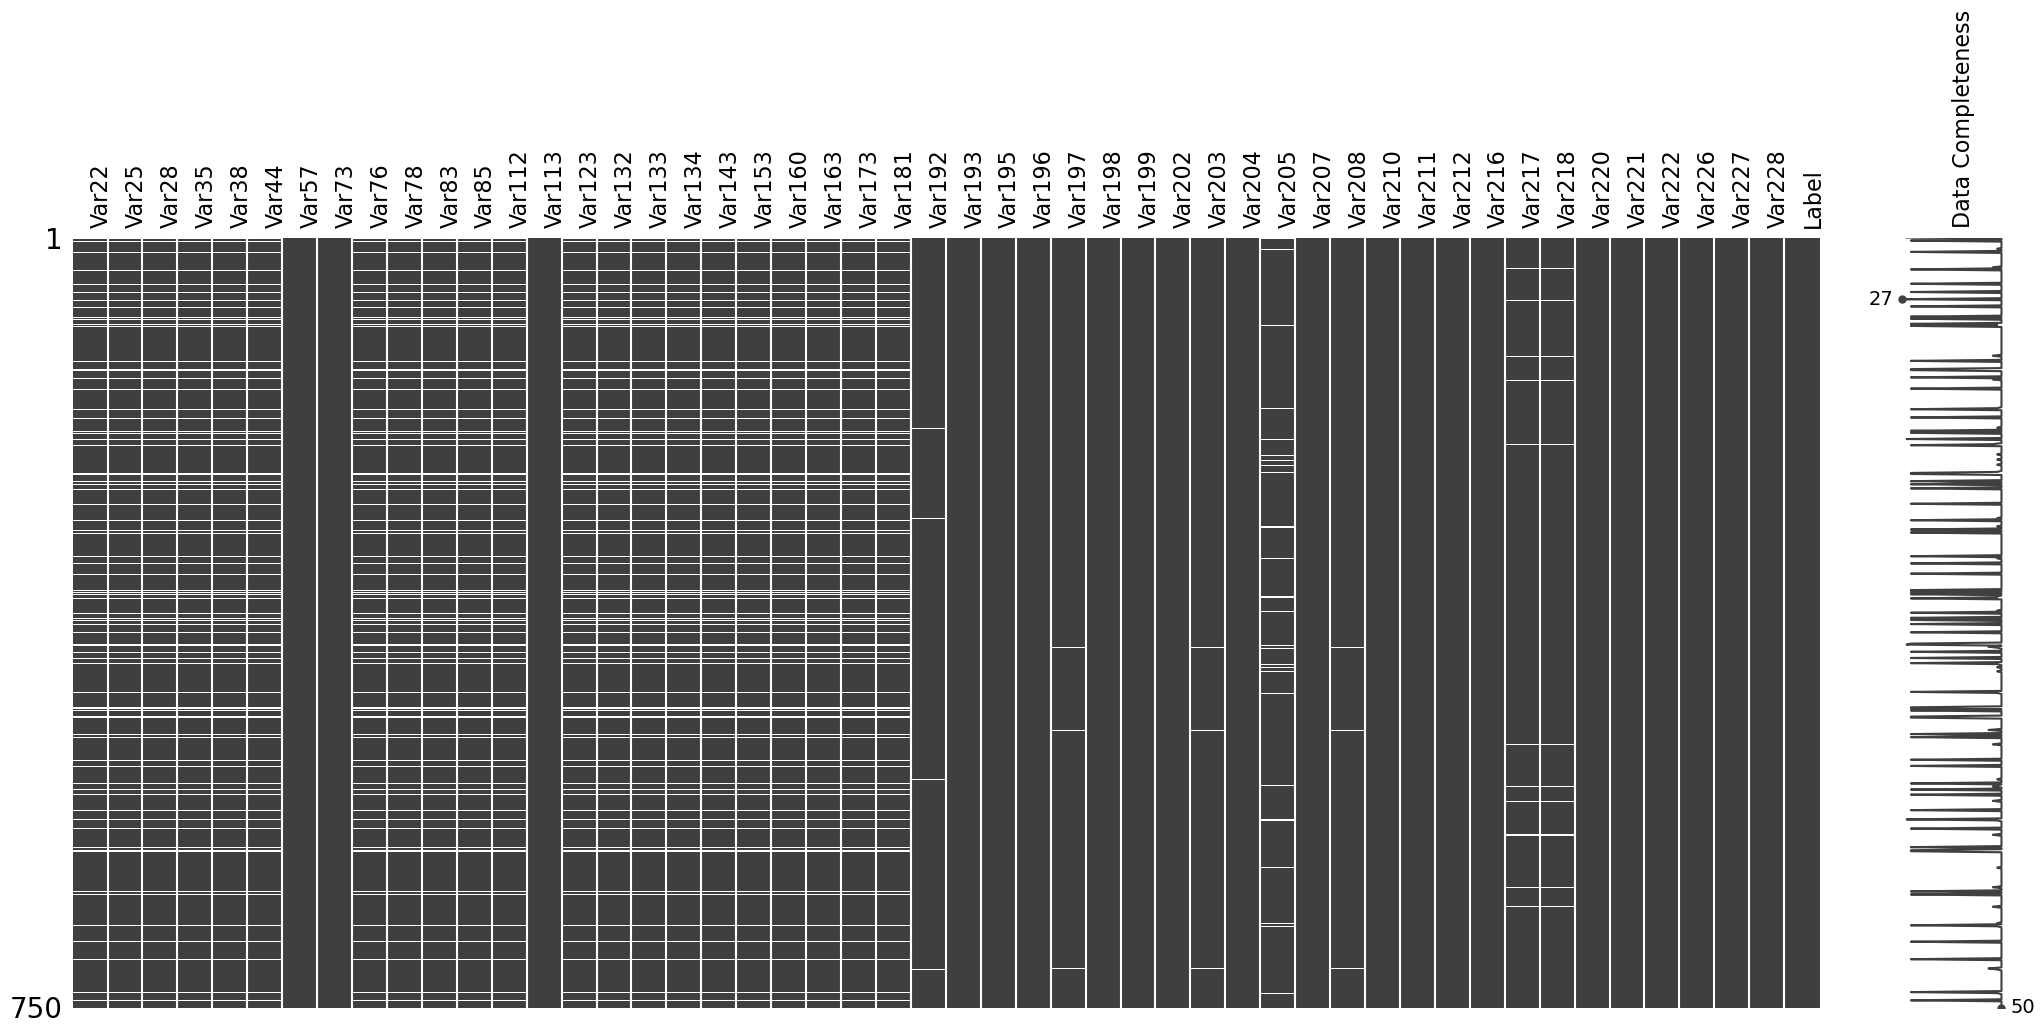

In [15]:
filter_data = msno.nullity_filter(df_drp_all_na, filter='top', n=50 )
msno.matrix(filter_data.sample(750), labels=True,label_rotation=90)
plt.show()

ValueError: could not convert string to float: '--'

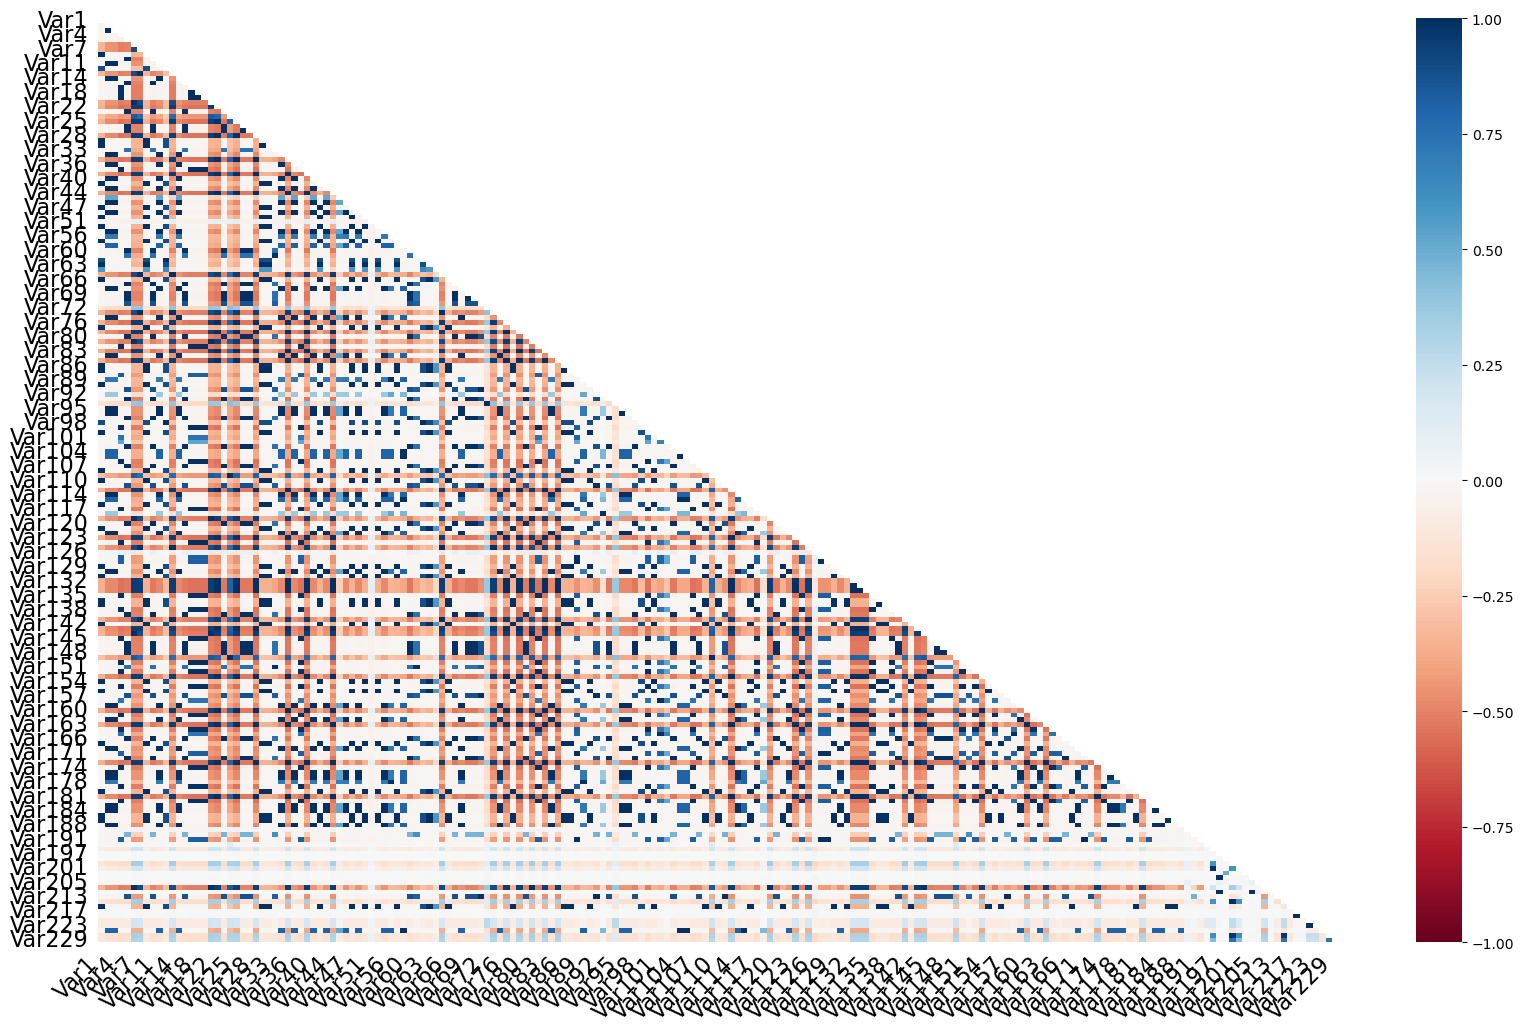

In [24]:
msno.heatmap(df_drp_all_na)

In [12]:
df_missing_data_less_than_50 = df_drp_all_na.loc[:, df_drp_all_na.isnull().mean() < 0.5]

ValueError: could not convert string to float: '--'

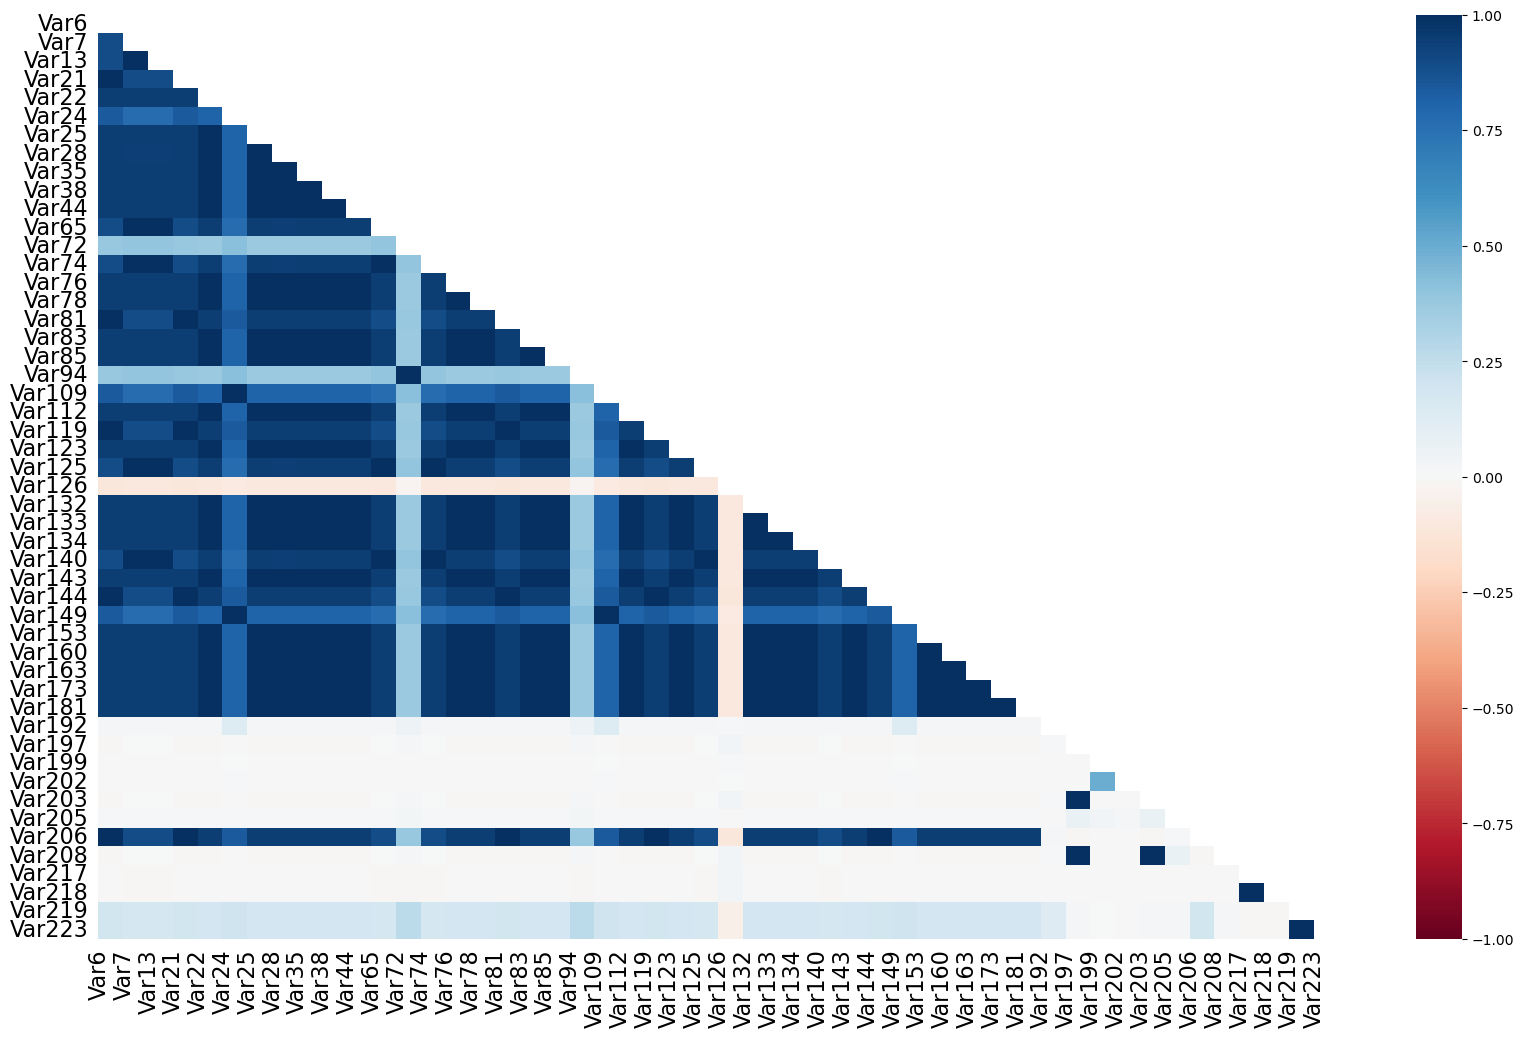

In [38]:
msno.heatmap(df_missing_data_less_than_50,label_rotation=90)

#### Observation* 
Most of the features we checked have value 1 meaning there is a correlation in* 
As there is a correlation in missingness, we can rule out Missing Completely at randm
ndom.

In [13]:
df_rm_mssng_lss_thn_50 = df_missing_data_less_than_50.dropna()

In [14]:
df_rm_mssng_lss_thn_50[['Var73','Var113']].describe()

,Var73,Var113
count,17867.00,17867.00
mean,69.55,-4066.53
std,52.54,476142.01
min,12.00,-6974840.00
25%,28.00,-67831.20
50%,52.00,76282.00
75%,106.00,169440.00
max,264.00,9278480.00


In [52]:
df_missing_data_less_than_50[['Var73','Var113']].describe()

,Var73,Var113
count,50000.00,50000.00
mean,66.64,-153278.61
std,52.86,761372.98
min,4.00,-9803600.00
25%,24.00,-182714.80
50%,52.00,29615.42
75%,102.00,147487.50
max,264.00,9932480.00


In [53]:
pd.concat([df_rm_mssng_lss_thn_50[['Var73','Var113']].describe(),df_missing_data_less_than_50[['Var73','Var113']].describe()],axis=1)

,Var73,Var113,Var73,Var113
count,17867.00,17867.00,50000.00,50000.00
mean,69.55,-4066.53,66.64,-153278.61
std,52.54,476142.01,52.86,761372.98
min,12.00,-6974840.00,4.00,-9803600.00
25%,28.00,-67831.20,24.00,-182714.80
50%,52.00,76282.00,52.00,29615.42
75%,106.00,169440.00,102.00,147487.50
max,264.00,9278480.00,264.00,9932480.00


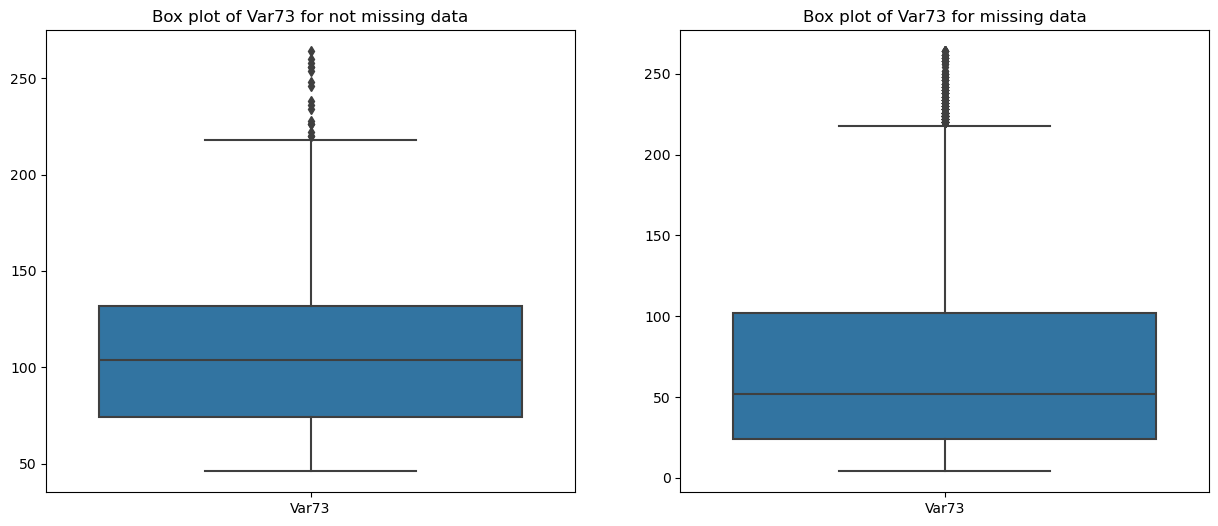

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize= (15,6))
sns.boxplot(data = df_rm_mssng_lss_thn_75[['Var73']], ax = ax1)
sns.boxplot(data = df_missing_data_less_than_75[['Var73']], ax = ax2)
ax1.set_title('Box plot of Var73 for not missing data')
ax2.set_title('Box plot of Var73 for missing data')
plt.show()

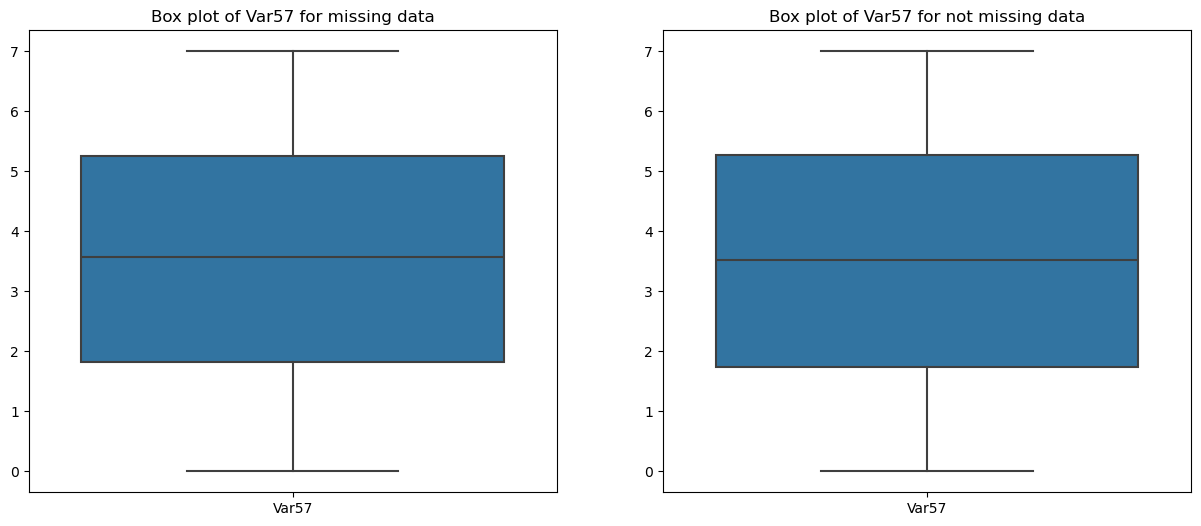

In [31]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize= (15,6))
sns.boxplot(data = df_rm_mssng_lss_thn_75[['Var57']], ax = ax1)
sns.boxplot(data = df_missing_data_less_than_75[['Var57']], ax = ax2)
ax1.set_title('Box plot of Var57 for missing data')
ax2.set_title('Box plot of Var57 for not missing data')
plt.show()

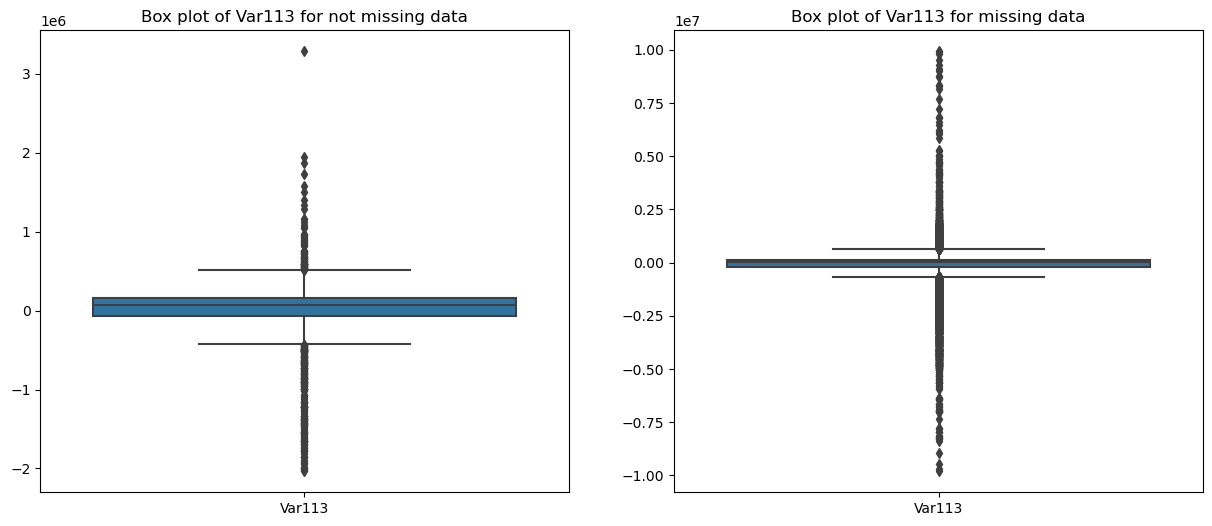

In [32]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize= (15,6))
sns.boxplot(data = df_rm_mssng_lss_thn_75[['Var113']], ax = ax1)
sns.boxplot(data = df_missing_data_less_than_75[['Var113']], ax = ax2)
ax1.set_title('Box plot of Var113 for not missing data')
ax2.set_title('Box plot of Var113 for missing data')
plt.show()

In [55]:
len(df_missing_data_less_than_50.columns)

70

### Imputing Missing Value for MAR

In [15]:
df_missing_data_less_than_50.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var192,Var193,Var195,Var196,Var197,Var198,Var199,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var226,Var227,Var228,Label
0,1526.00,7.00,184.00,464.00,580.00,14.00,128.00,166.56,0.00,3570.00,0.00,4.08,9.00,NaN,36,35.00,1350864.00,0.00,7333.11,5.00,12.00,NaN,104.00,168.00,117625.60,1175.00,6.00,720.00,8.00,0.00,1212385.00,69134.00,185.00,0.00,9.00,397579.00,1812252.00,142.00,38418.00,0.00,0.00,bZkvyxLkBI,RO12,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,dXGu,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,XTbPUYD,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,xb3V,RAYp,F2FyR07IdsN7I,-1
1,525.00,0.00,0.00,168.00,210.00,2.00,24.00,353.52,0.00,4764966.00,0.00,5.41,9.00,3.00,26,0.00,2872928.00,3.00,151098.90,25.00,2.00,58158.00,40.00,40.00,-356411.60,590.00,72.00,0.00,NaN,8.00,4136430.00,357038.00,0.00,0.00,9.00,278334.00,10439160.00,32.00,238572.00,0.00,0.00,CEat0G8rTN,RO12,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,lg1t,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,kZJyVg2,NaN,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,fKCe,RAYp,F2FyR07IdsN7I,1
2,5236.00,7.00,904.00,1212.00,1515.00,26.00,816.00,220.08,0.00,5883894.00,0.00,6.60,9.00,NaN,130,518.00,1675776.00,0.00,16211.58,40.00,58.00,NaN,312.00,336.00,405104.00,3230.00,114.00,5967.00,-28.00,0.00,3478905.00,248932.00,800.00,0.00,36.00,320565.00,9826360.00,206.00,434946.00,0.00,0.00,eOQt0GoOh3,AERks4l,taul,1K8T,ffXs,NldASpP,y4g9XoZ,4bTR,9_Y1,MGOA,VpdQ,haYg,DHn_WUyBhW_whjA88g9bvA64_,kIsH,uKAI,L84s,UbxQ8lZ,pMWAe2U,bHR7,UYBR,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,Qu4f,02N6s8f,ib5G6X1eUxUn6,-1
3,NaN,0.00,0.00,NaN,0.00,NaN,0.00,22.08,0.00,0.00,0.00,1.99,9.00,NaN,12,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,0.00,-275703.60,NaN,0.00,0.00,-14.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,jg69tYsGvO,RO12,taul,1K8T,ssAy,_ybO0dd,4hMlgkf58mhwh,W8mQ,9_Y1,YULl,VpdQ,NaN,me75fM6ugJ,kIsH,uKAI,Mtgm,NhsEn4L,kq0dQfu,eKej,UYBR,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I,-1
4,1029.00,7.00,3216.00,64.00,80.00,4.00,64.00,200.00,0.00,0.00,0.00,4.55,18.00,3.00,82,224.00,784448.00,0.00,37423.50,0.00,0.00,89754.00,32.00,56.00,10714.84,215.00,0.00,15111.00,58.00,0.00,150650.00,66046.00,3255.00,0.00,9.00,267162.00,644836.00,2.00,0.00,0.00,0.00,IXSgUHShse,RO12,taul,1K8T,uNkU,EKR938I,ThrHXVS,xklU,9_Y1,RVjC,sJzTlal,6JmL,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,11p4mKe,H3p7,UYBR,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I,-1


In [45]:
df_missing_data_less_than_50_int = df_missing_data_less_than_50.select_dtypes(exclude=["object"])

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

In [24]:
from sklearn.impute import KNNImputer

In [25]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")

array([[ 1.526e+03,  7.000e+00,  1.840e+02, ...,  0.000e+00,  0.000e+00,
        -1.000e+00],
       [ 5.250e+02,  0.000e+00,  0.000e+00, ...,  0.000e+00,  0.000e+00,
         1.000e+00],
       [ 5.236e+03,  7.000e+00,  9.040e+02, ...,  0.000e+00,  0.000e+00,
        -1.000e+00],
       ...,
       [ 2.807e+03,  7.000e+00,  1.460e+03, ...,  0.000e+00,  0.000e+00,
        -1.000e+00],
       [ 1.085e+03,  7.000e+00,  4.220e+02, ...,  0.000e+00,  0.000e+00,
        -1.000e+00],
       [ 1.694e+03,  7.000e+00,  8.280e+02, ...,  0.000e+00,  0.000e+00,
        -1.000e+00]])

In [26]:
arr_lss_thn_50_int_wot_na = imputer.fit_transform(df_missing_data_less_than_50_int)

In [40]:
df_lss_thn_50_int_wot_na = pd.DataFrame(arr_lss_thn_50_int_wot_na, columns = df_missing_data_less_than_50_int.columns)

In [41]:
df_lss_thn_50_int_wot_na.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Label
0,1526.00,7.00,184.00,464.00,580.00,14.00,128.00,166.56,0.00,3570.00,0.00,4.08,9.00,3.00,36.00,35.00,1350864.00,0.00,7333.11,5.00,12.00,24280.50,104.00,168.00,117625.60,1175.00,6.00,720.00,8.00,0.00,1212385.00,69134.00,185.00,0.00,9.00,397579.00,1812252.00,142.00,38418.00,0.00,0.00,-1.00
1,525.00,0.00,0.00,168.00,210.00,2.00,24.00,353.52,0.00,4764966.00,0.00,5.41,9.00,3.00,26.00,0.00,2872928.00,3.00,151098.90,25.00,2.00,58158.00,40.00,40.00,-356411.60,590.00,72.00,0.00,-7.00,8.00,4136430.00,357038.00,0.00,0.00,9.00,278334.00,10439160.00,32.00,238572.00,0.00,0.00,1.00
2,5236.00,7.00,904.00,1212.00,1515.00,26.00,816.00,220.08,0.00,5883894.00,0.00,6.60,9.00,6.00,130.00,518.00,1675776.00,0.00,16211.58,40.00,58.00,105141.00,312.00,336.00,405104.00,3230.00,114.00,5967.00,-28.00,0.00,3478905.00,248932.00,800.00,0.00,36.00,320565.00,9826360.00,206.00,434946.00,0.00,0.00,-1.00
3,98.00,0.00,0.00,0.00,0.00,0.00,0.00,22.08,0.00,0.00,0.00,1.99,9.00,3.00,12.00,0.00,0.00,0.00,83521.50,0.00,0.00,20439.00,0.00,0.00,-275703.60,92.50,0.00,0.00,-14.00,0.00,0.00,0.00,0.00,0.00,4.50,0.00,0.00,0.00,0.00,0.00,0.00,-1.00
4,1029.00,7.00,3216.00,64.00,80.00,4.00,64.00,200.00,0.00,0.00,0.00,4.55,18.00,3.00,82.00,224.00,784448.00,0.00,37423.50,0.00,0.00,89754.00,32.00,56.00,10714.84,215.00,0.00,15111.00,58.00,0.00,150650.00,66046.00,3255.00,0.00,9.00,267162.00,644836.00,2.00,0.00,0.00,0.00,-1.00


In [37]:
df_missing_data_less_than_50_int.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Label
0,1526.00,7.00,184.00,464.00,580.00,14.00,128.00,166.56,0.00,3570.00,0.00,4.08,9.00,None,36,35.00,1350864.00,0.00,7333.11,5.00,12.00,None,104.00,168.00,117625.60,1175.00,6.00,720.00,8.00,0.00,1212385.00,69134.00,185.00,0.00,9.00,397579.00,1812252.00,142.00,38418.00,0.00,0.00,-1
1,525.00,0.00,0.00,168.00,210.00,2.00,24.00,353.52,0.00,4764966.00,0.00,5.41,9.00,3.00,26,0.00,2872928.00,3.00,151098.90,25.00,2.00,58158.00,40.00,40.00,-356411.60,590.00,72.00,0.00,None,8.00,4136430.00,357038.00,0.00,0.00,9.00,278334.00,10439160.00,32.00,238572.00,0.00,0.00,1
2,5236.00,7.00,904.00,1212.00,1515.00,26.00,816.00,220.08,0.00,5883894.00,0.00,6.60,9.00,None,130,518.00,1675776.00,0.00,16211.58,40.00,58.00,None,312.00,336.00,405104.00,3230.00,114.00,5967.00,-28.00,0.00,3478905.00,248932.00,800.00,0.00,36.00,320565.00,9826360.00,206.00,434946.00,0.00,0.00,-1
3,None,0.00,0.00,None,0.00,None,0.00,22.08,0.00,0.00,0.00,1.99,9.00,None,12,0.00,0.00,0.00,None,0.00,0.00,None,None,0.00,-275703.60,None,0.00,0.00,-14.00,0.00,0.00,0.00,0.00,0.00,None,None,0.00,0.00,0.00,0.00,0.00,-1
4,1029.00,7.00,3216.00,64.00,80.00,4.00,64.00,200.00,0.00,0.00,0.00,4.55,18.00,3.00,82,224.00,784448.00,0.00,37423.50,0.00,0.00,89754.00,32.00,56.00,10714.84,215.00,0.00,15111.00,58.00,0.00,150650.00,66046.00,3255.00,0.00,9.00,267162.00,644836.00,2.00,0.00,0.00,0.00,-1


In [18]:
df_missing_data_less_than_50_int

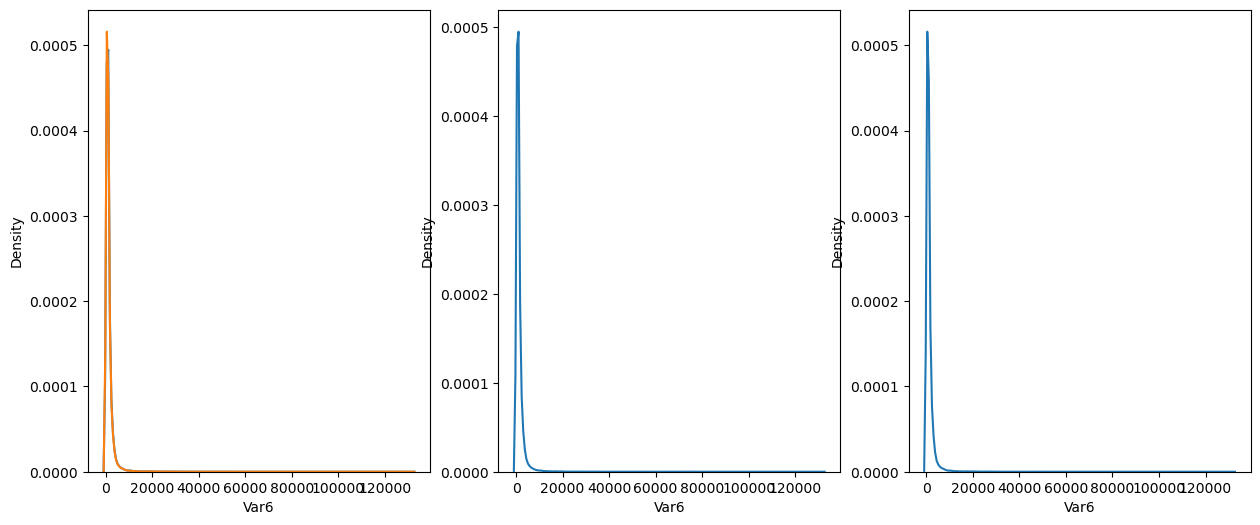

In [49]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize= (15,6))
sns.kdeplot(df_missing_data_less_than_50_int['Var6'], ax = ax1)
sns.kdeplot(df_lss_thn_50_int_wot_na['Var6'], ax = ax1)
sns.kdeplot(df_missing_data_less_than_50_int['Var6'], ax = ax2)
sns.kdeplot(df_lss_thn_50_int_wot_na['Var6'], ax = ax3)
plt.show()

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize= (15,6))
sns.kdeplot(df_missing_data_less_than_50_int['Var6'], ax = ax1)
sns.kdeplot(df_lss_thn_50_int_wot_na['Var6'], ax = ax1)
sns.kdeplot(df_missing_data_less_than_50_int['Var6'], ax = ax2)
sns.kdeplot(df_lss_thn_50_int_wot_na['Var6'], ax = ax3)
plt.show()

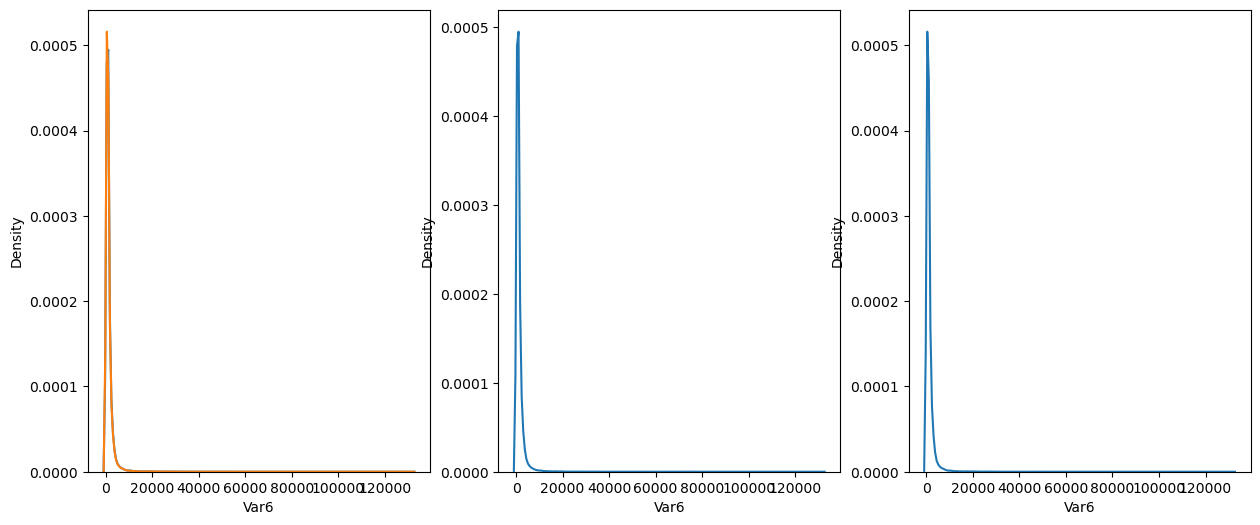

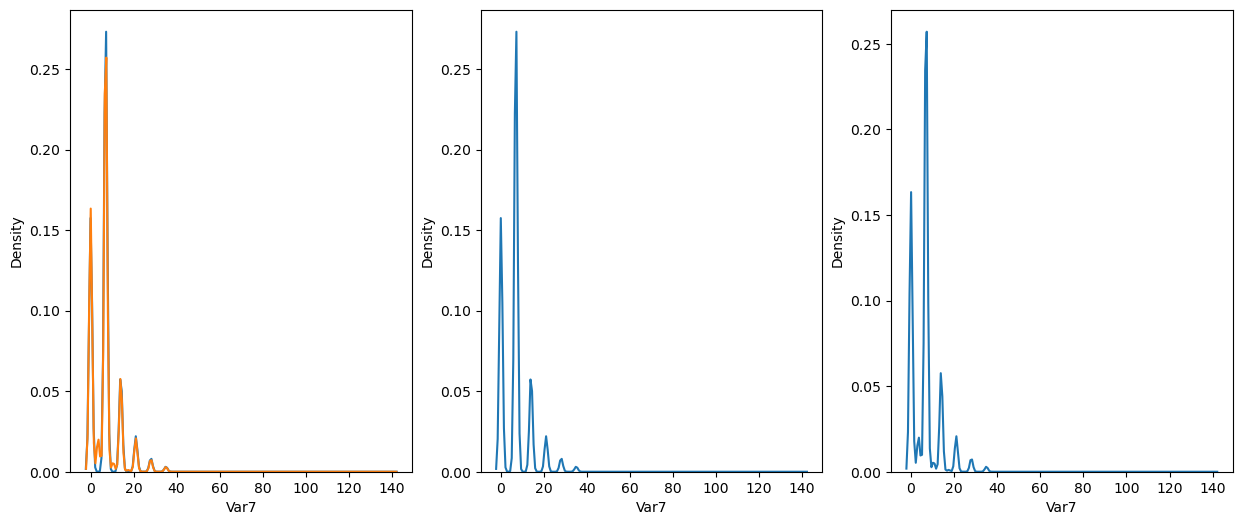

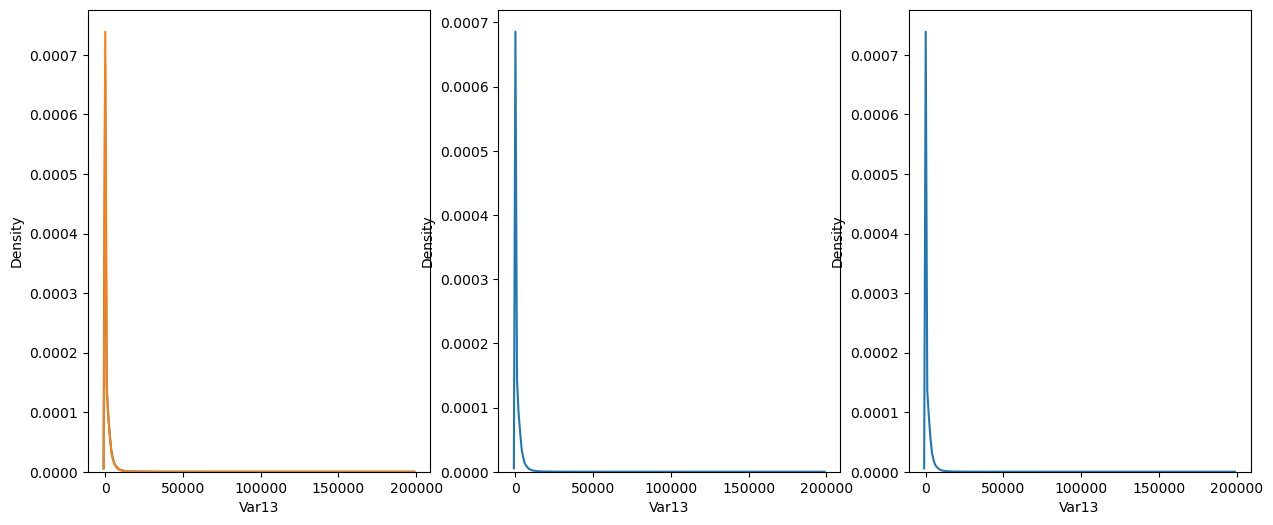

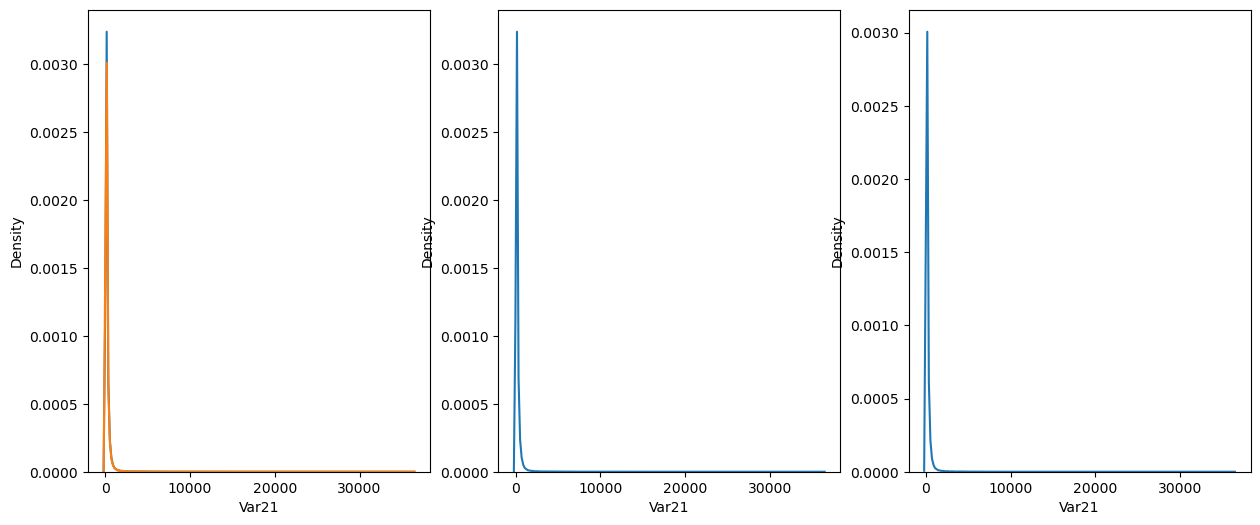

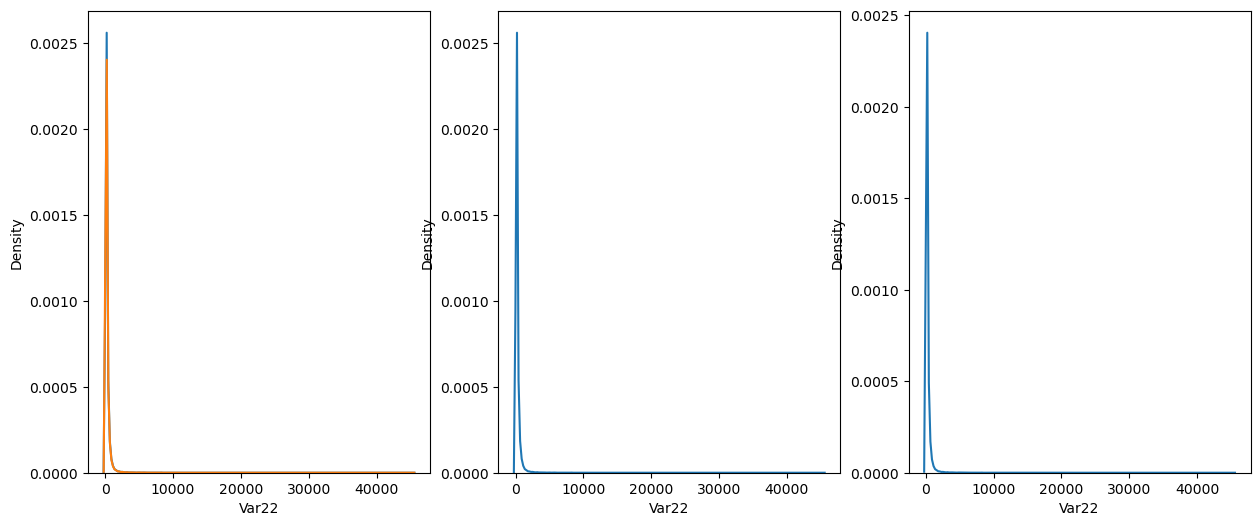

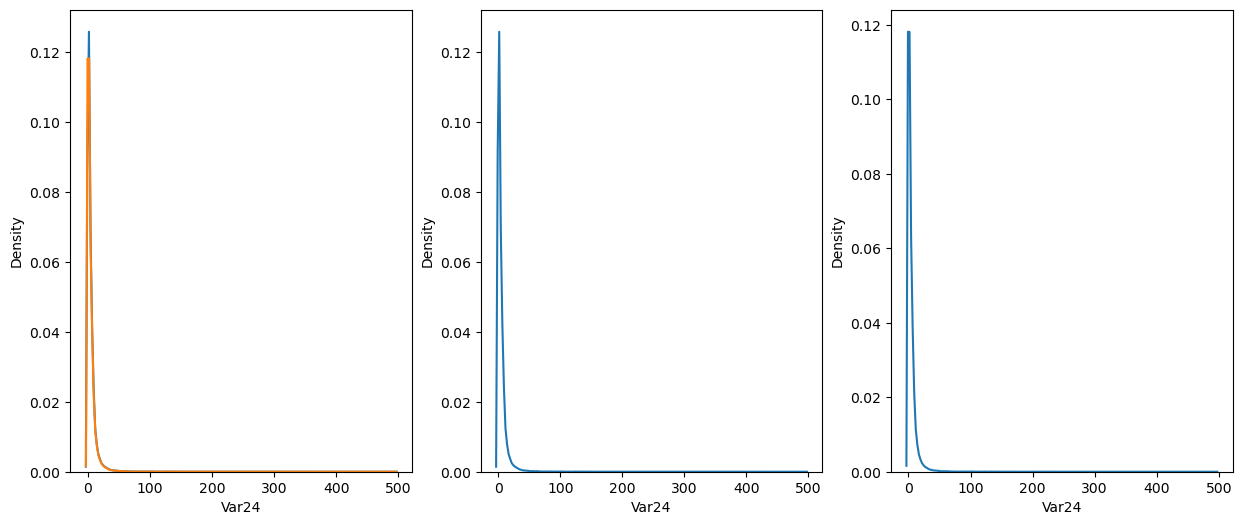

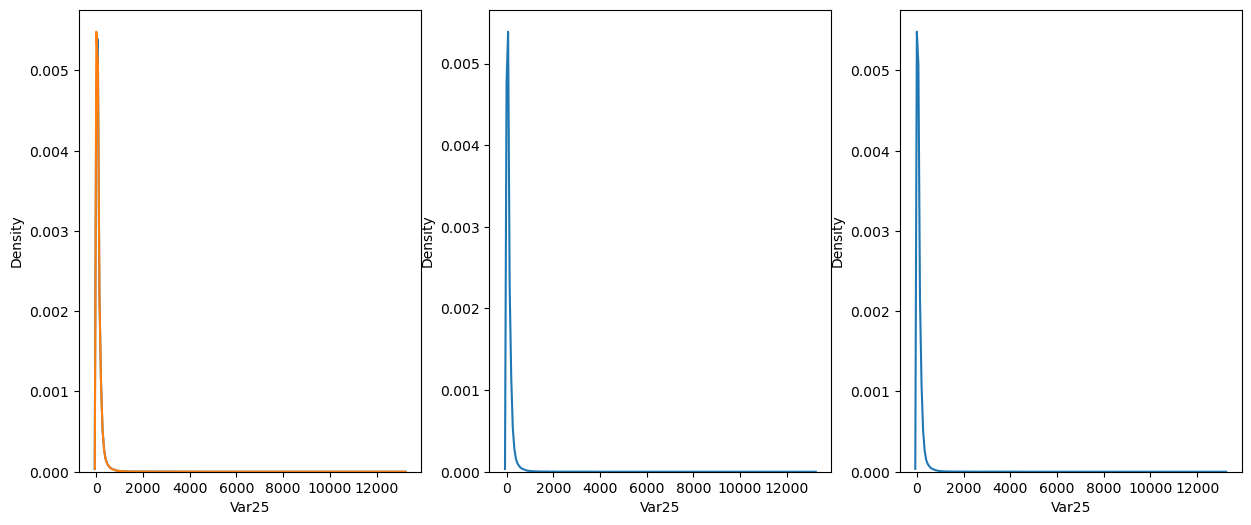

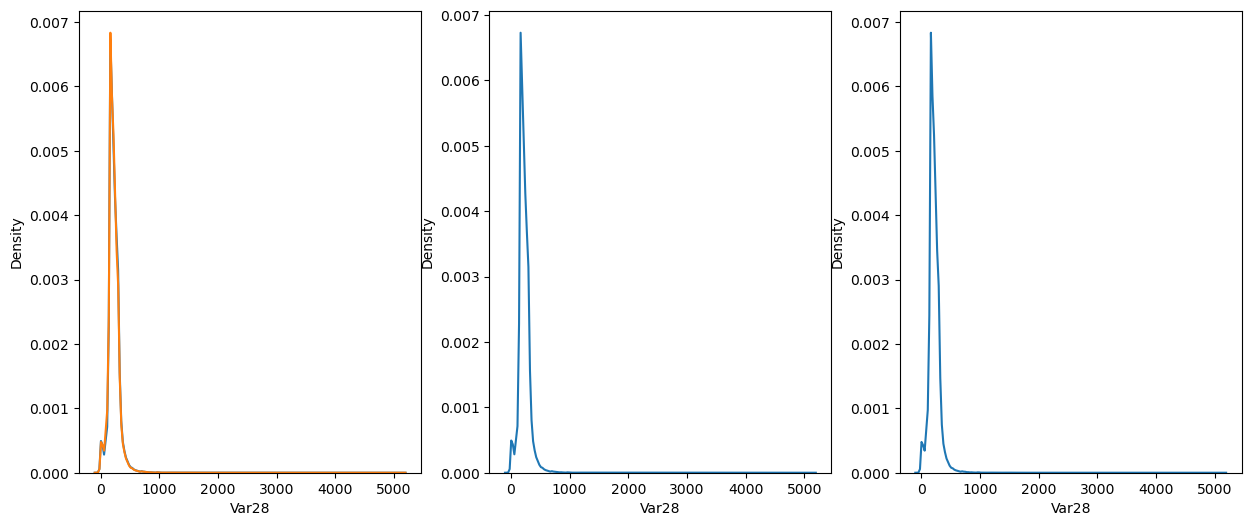

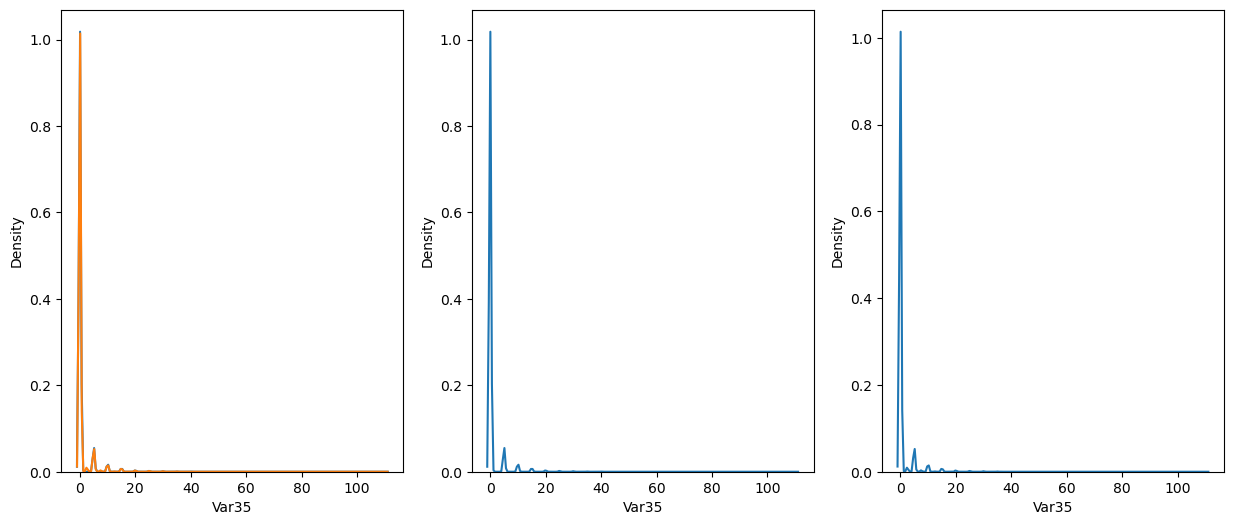

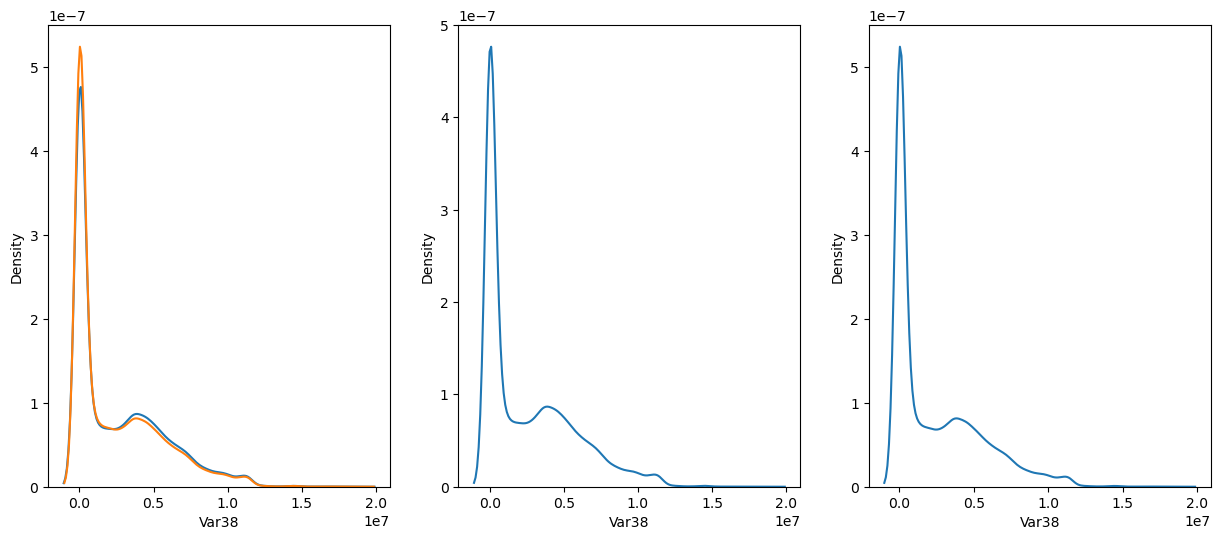

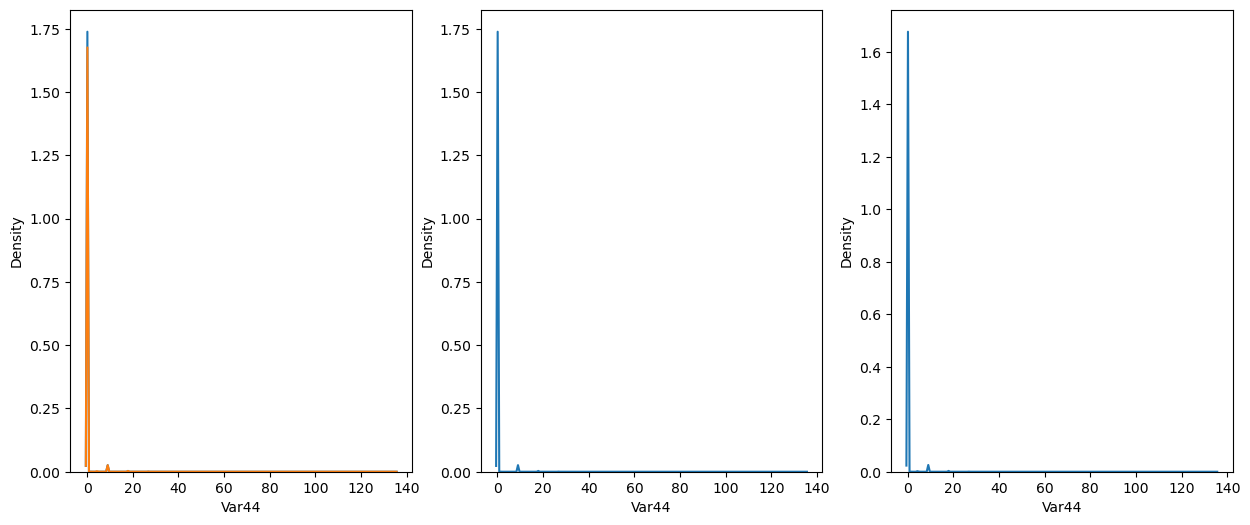

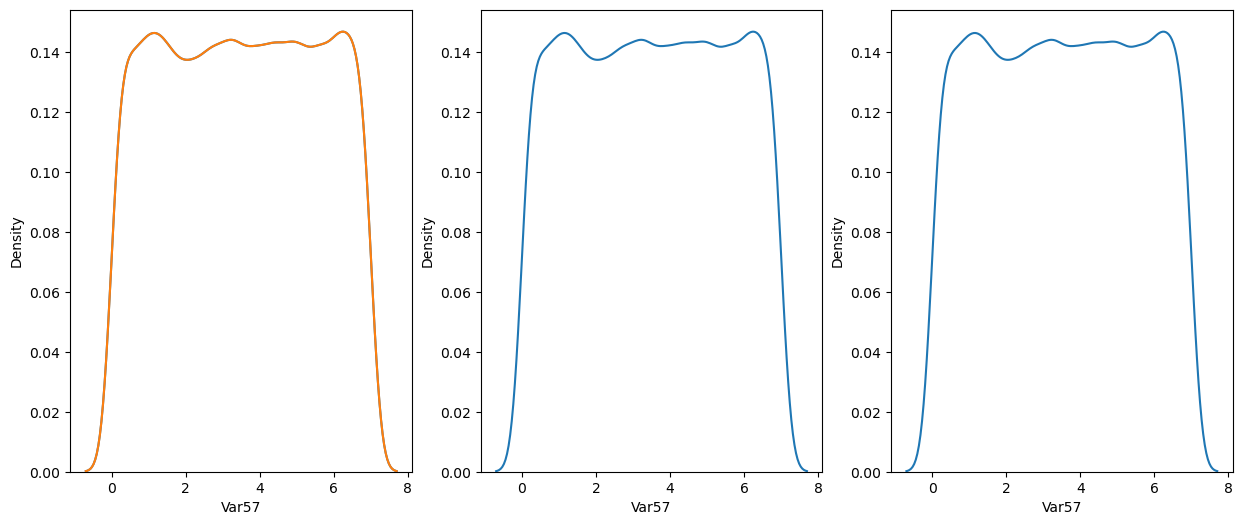

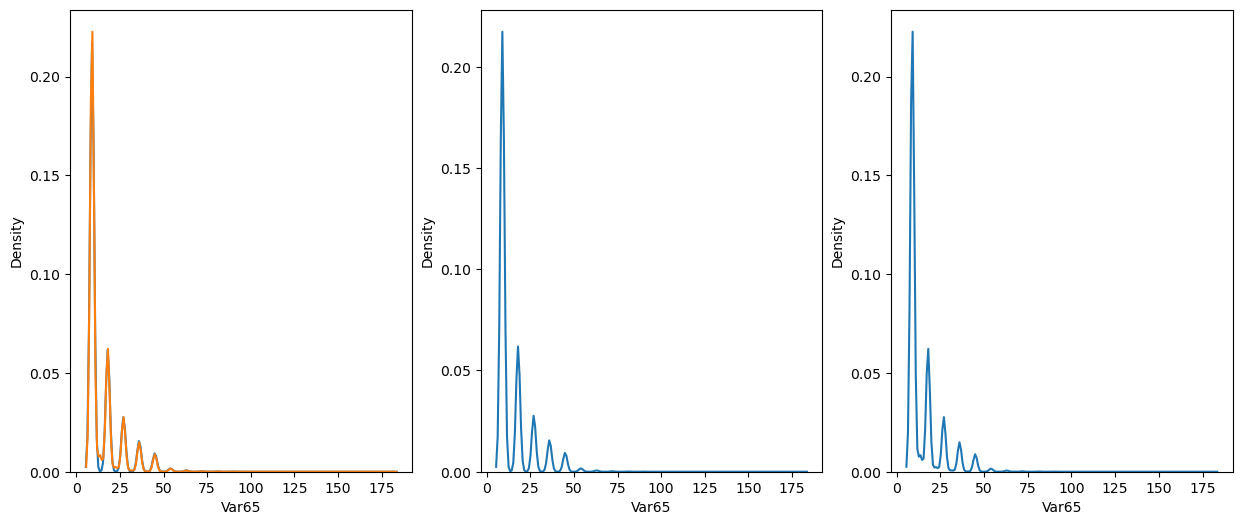

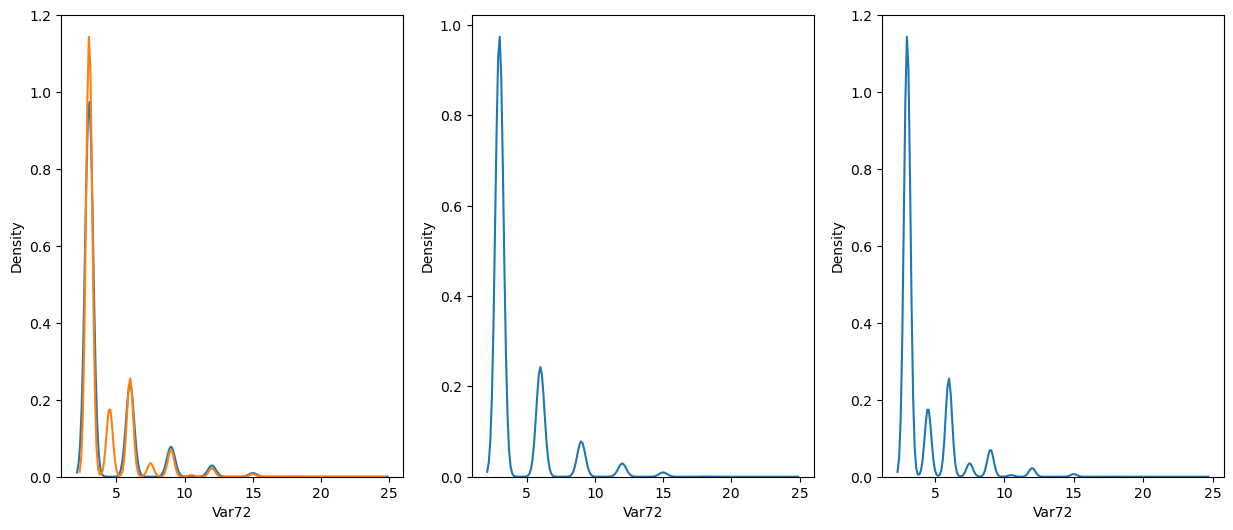

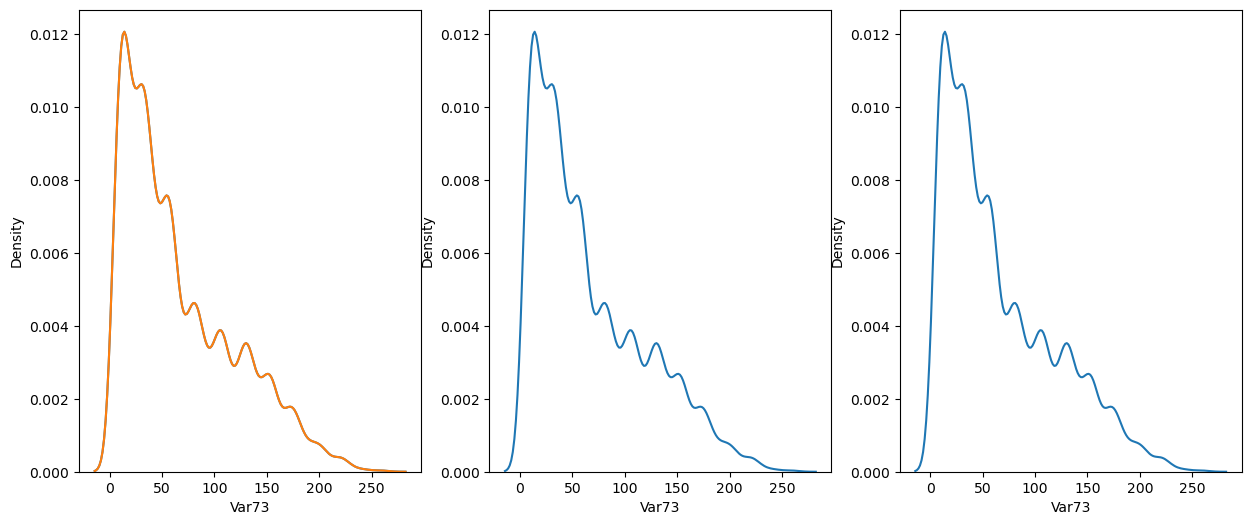

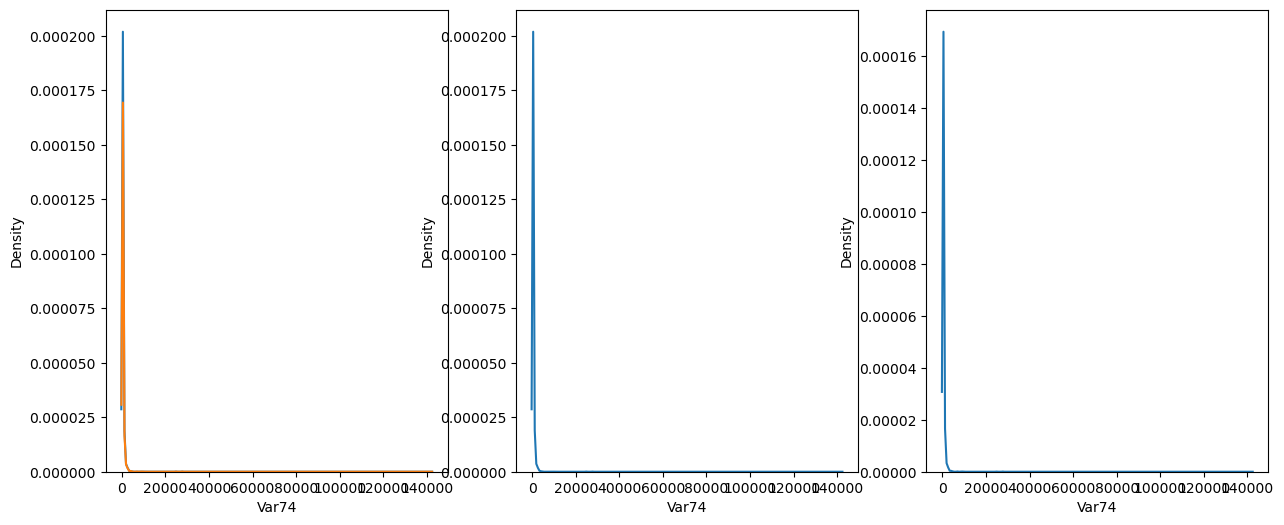

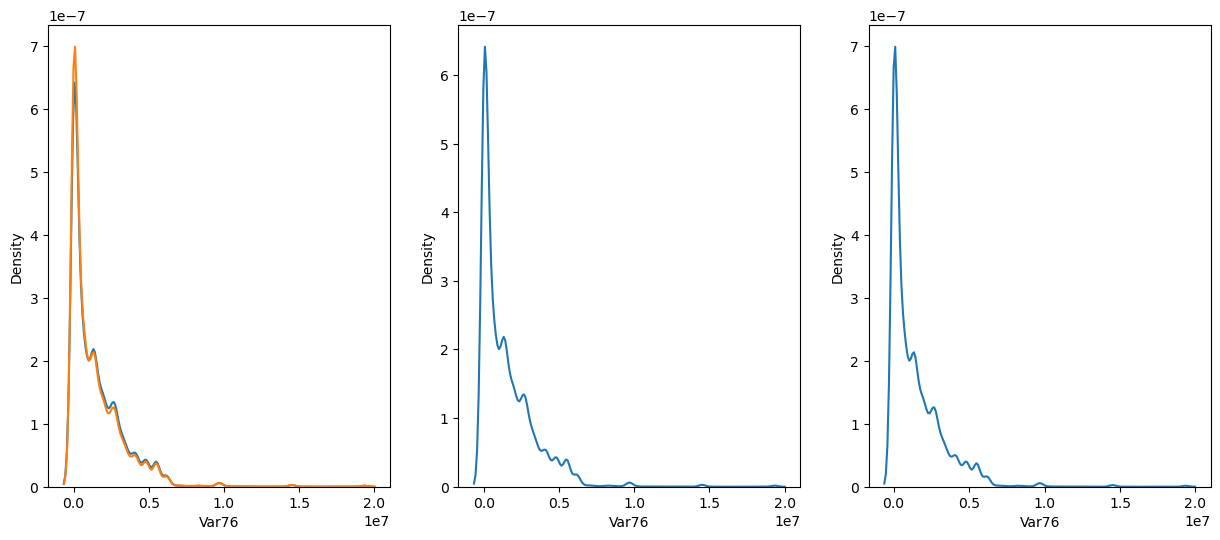

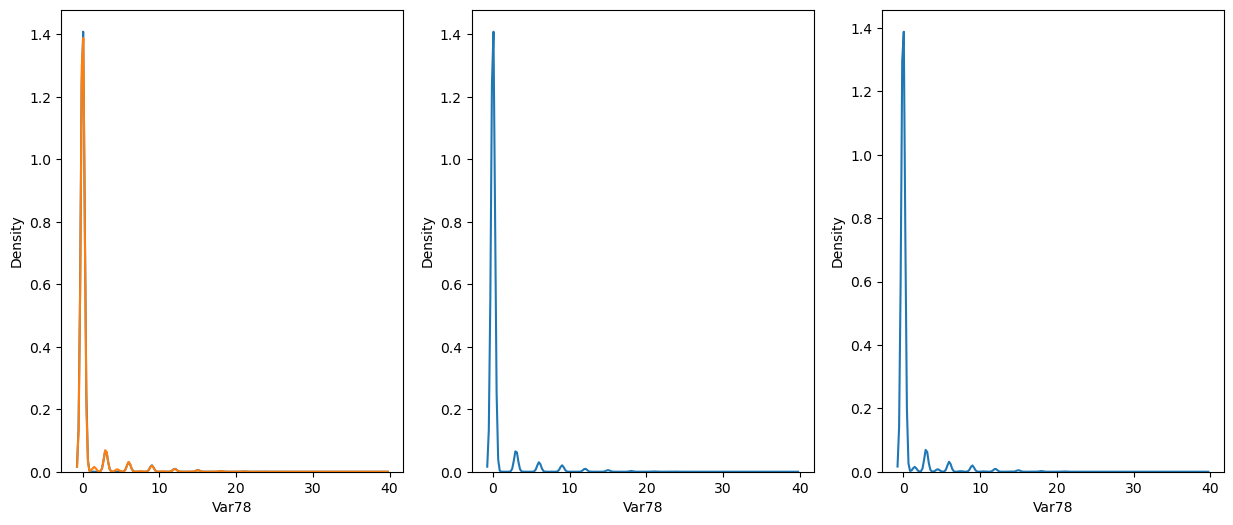

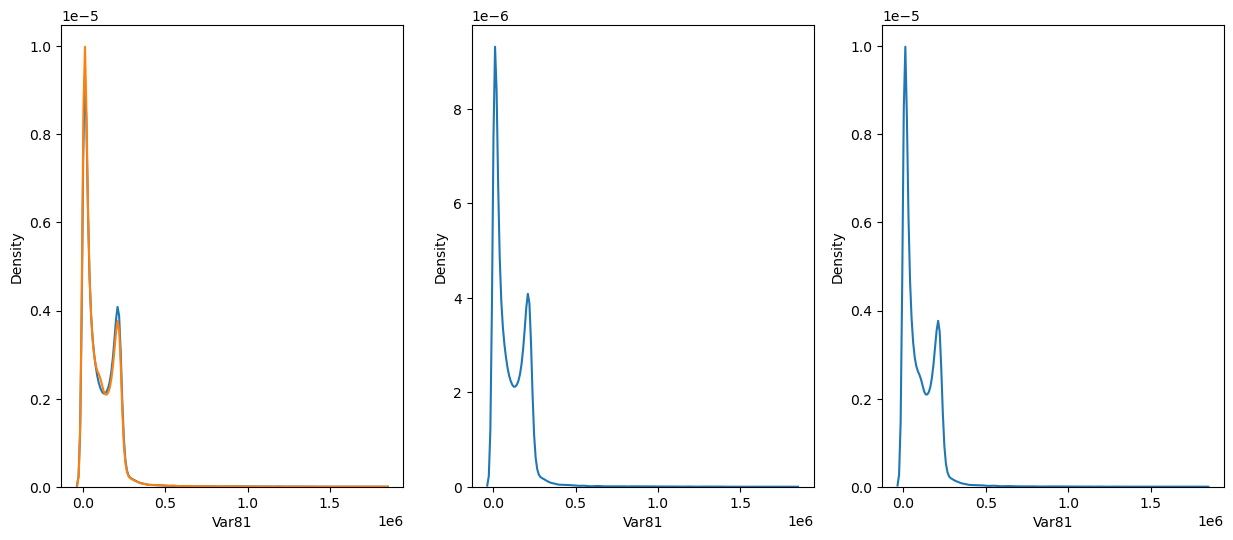

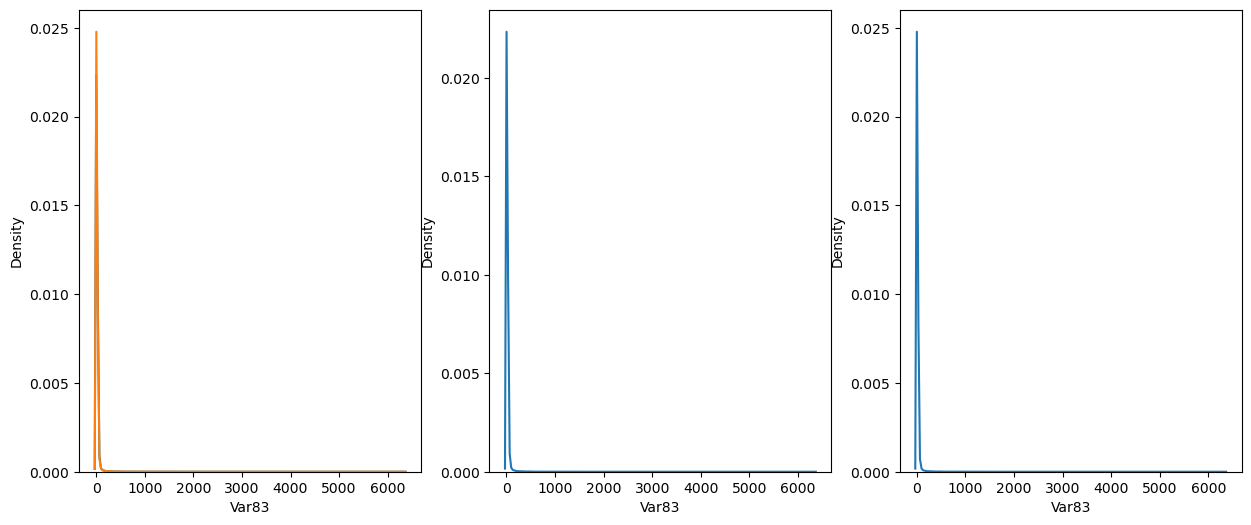

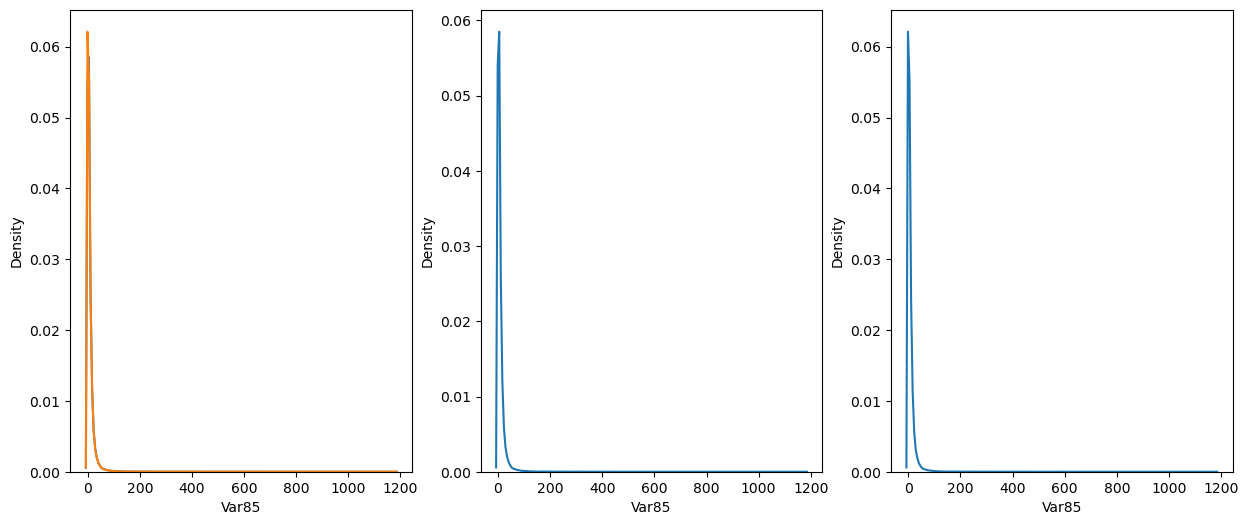

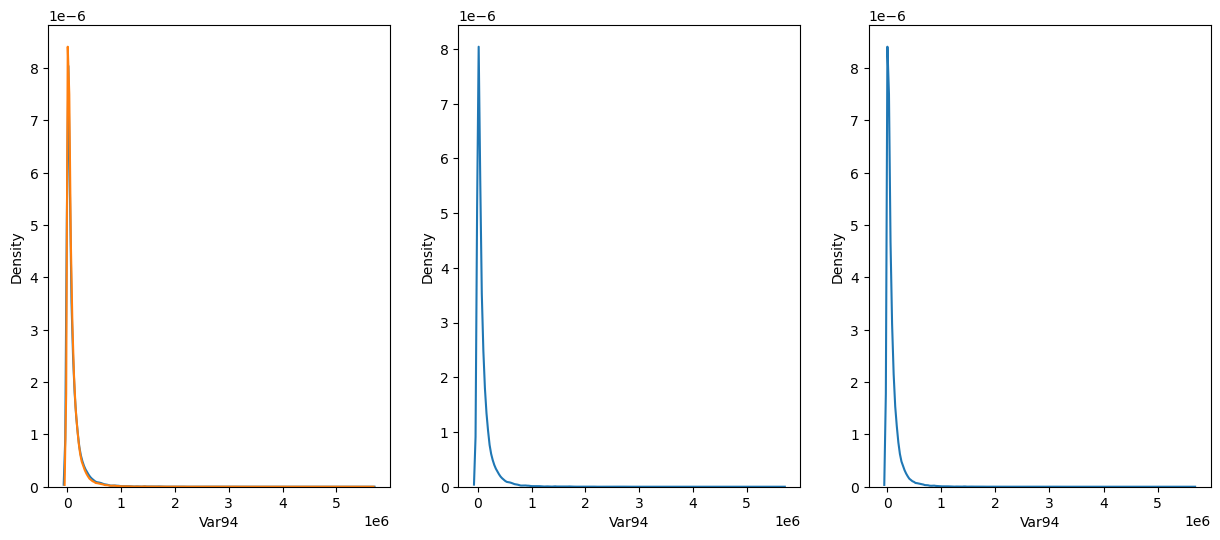

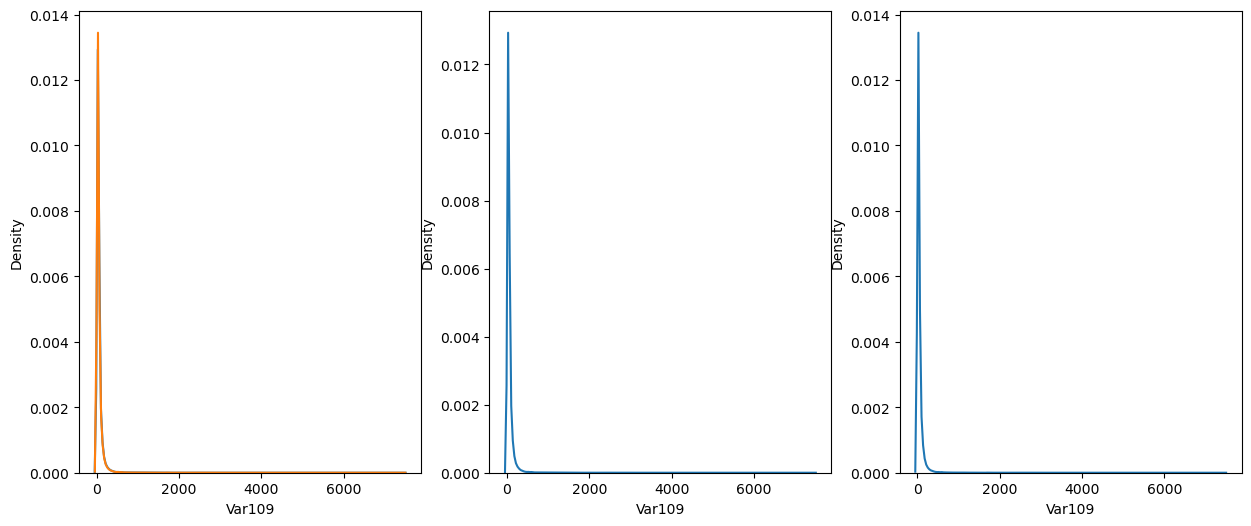

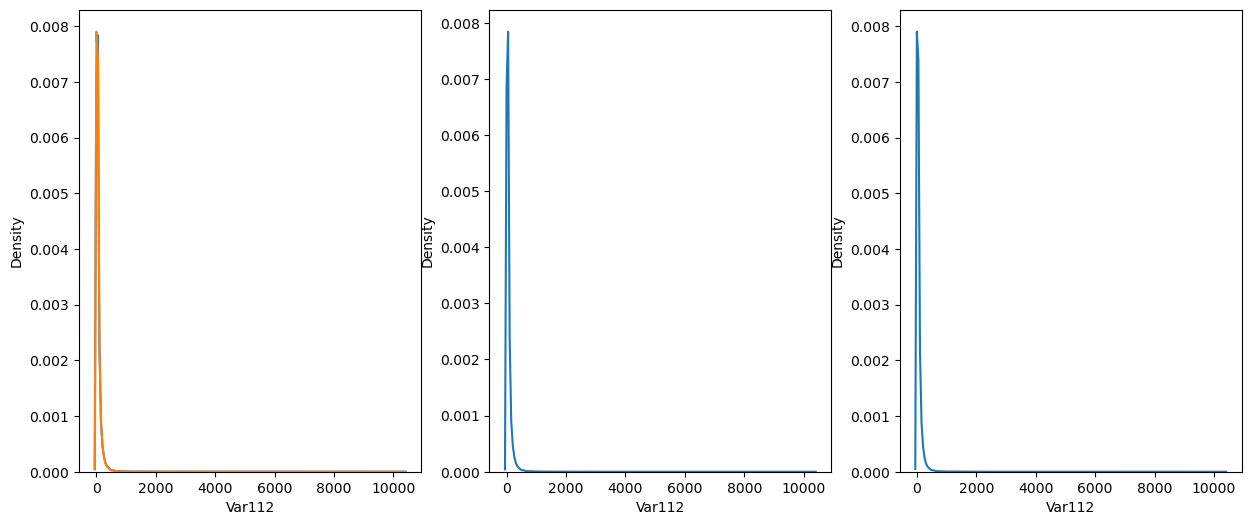

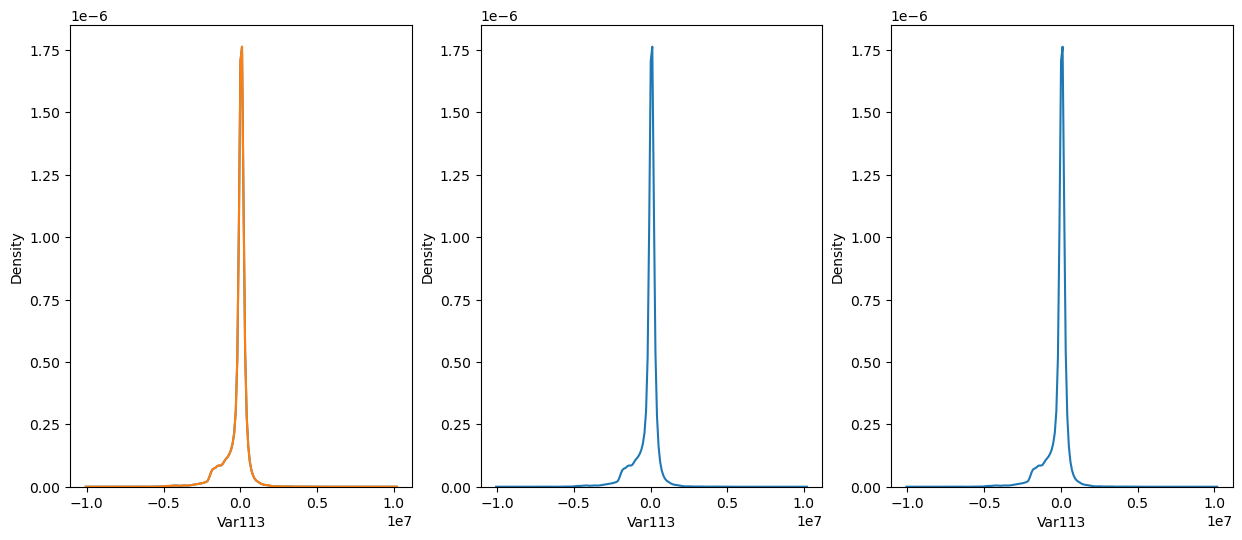

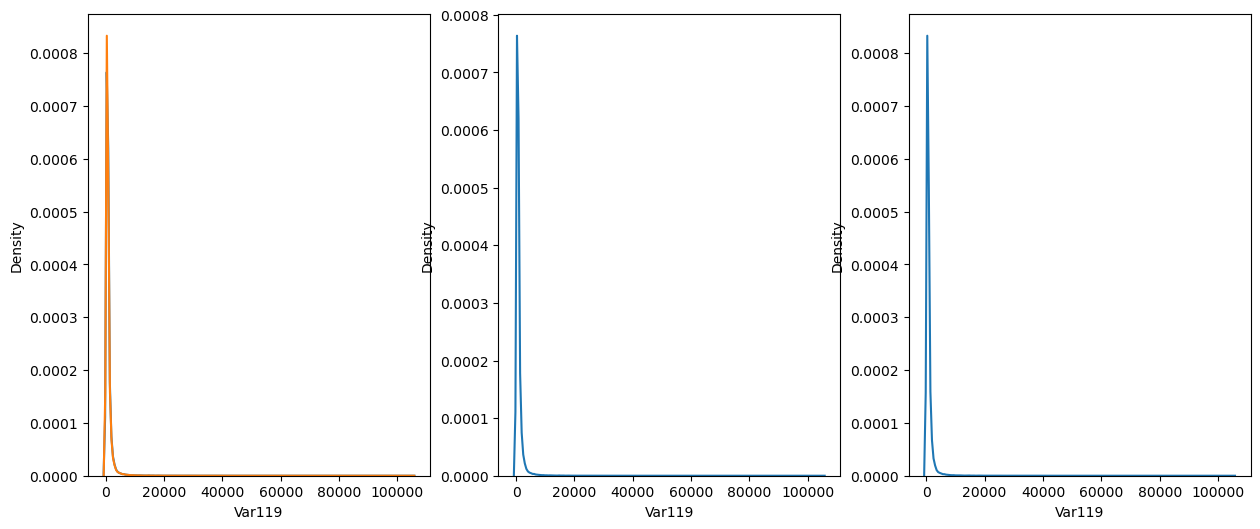

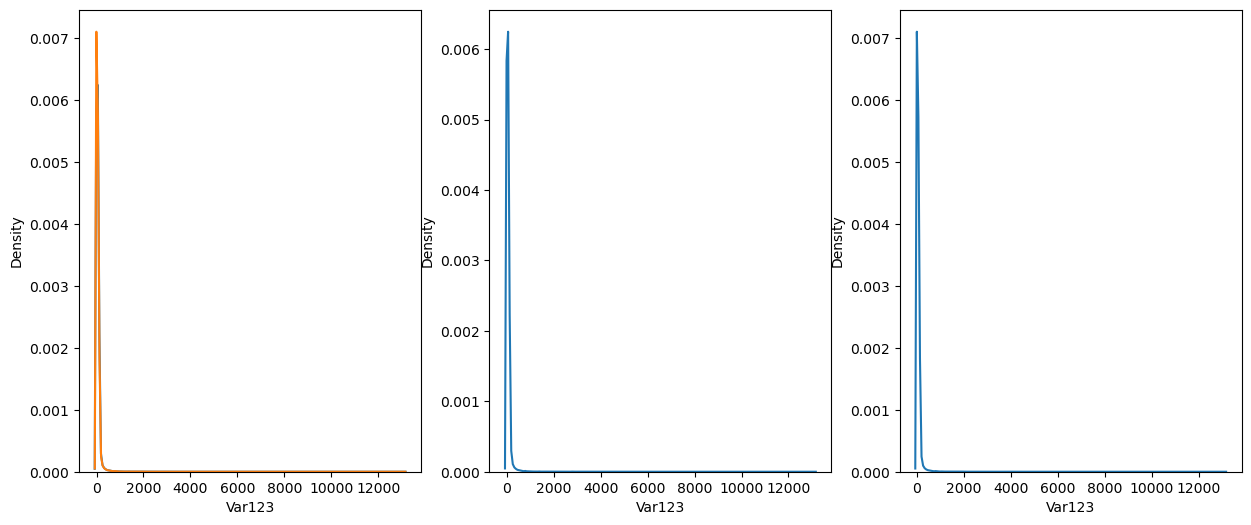

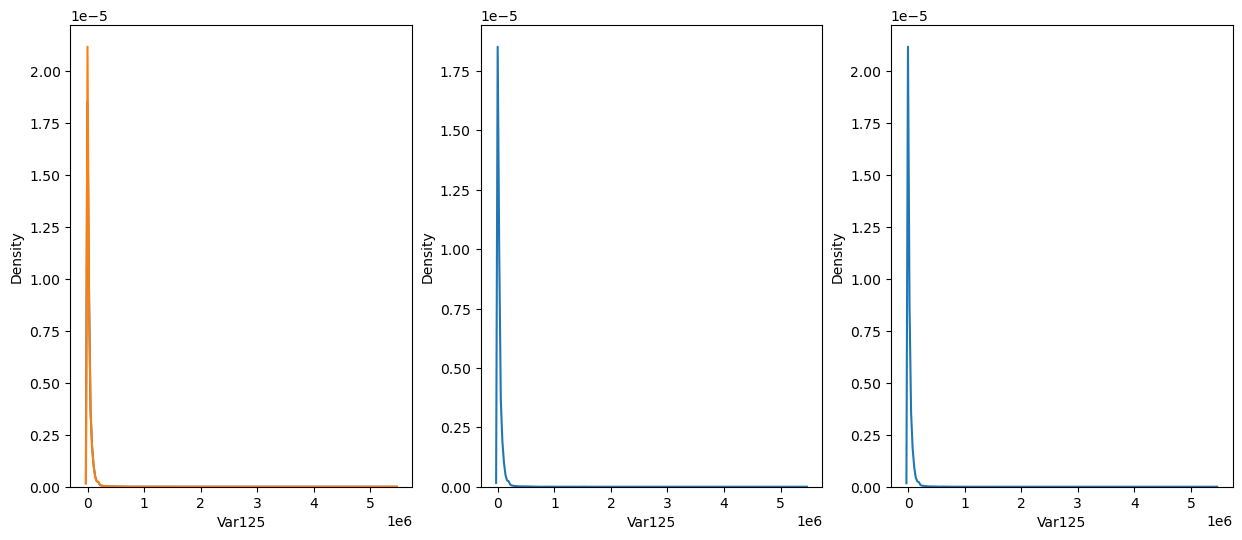

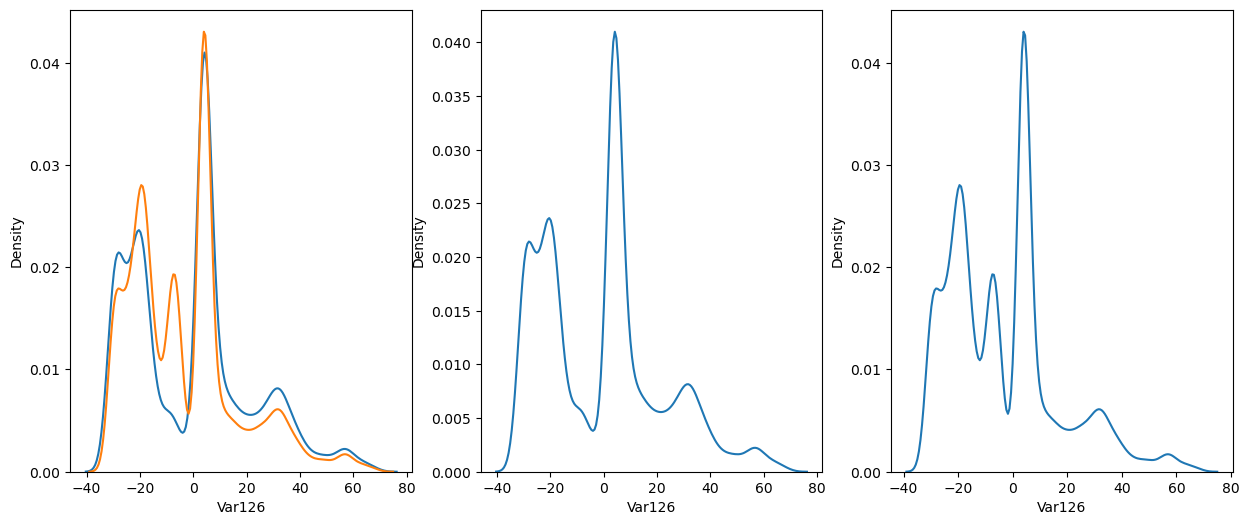

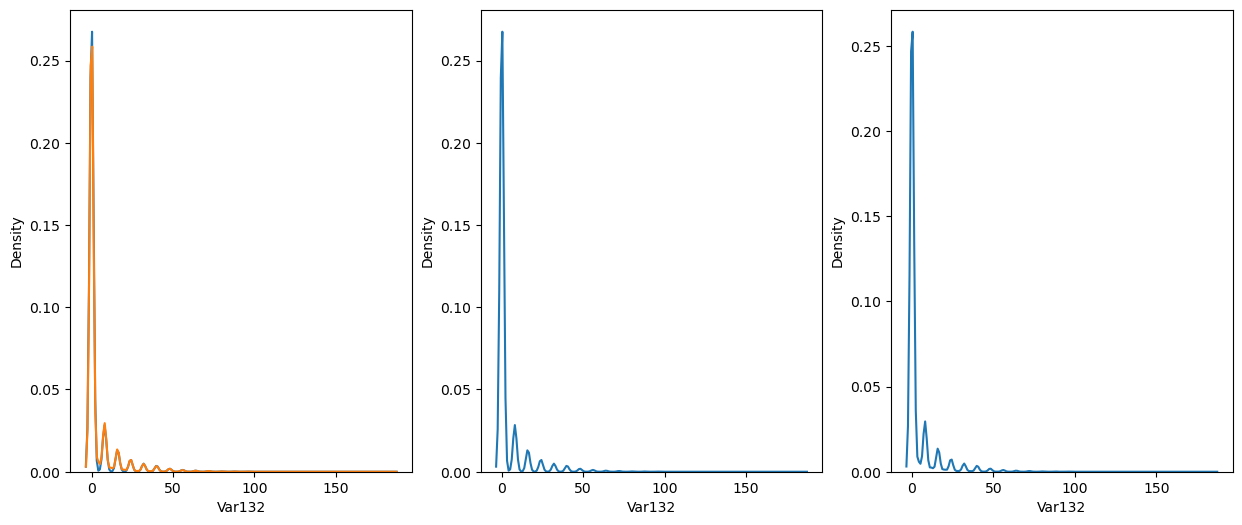

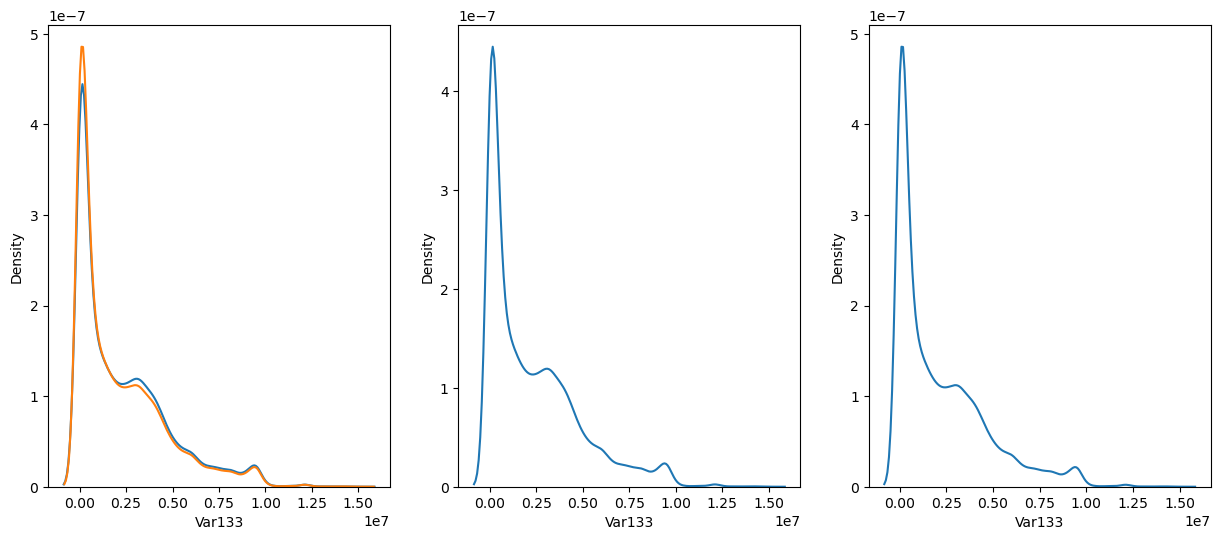

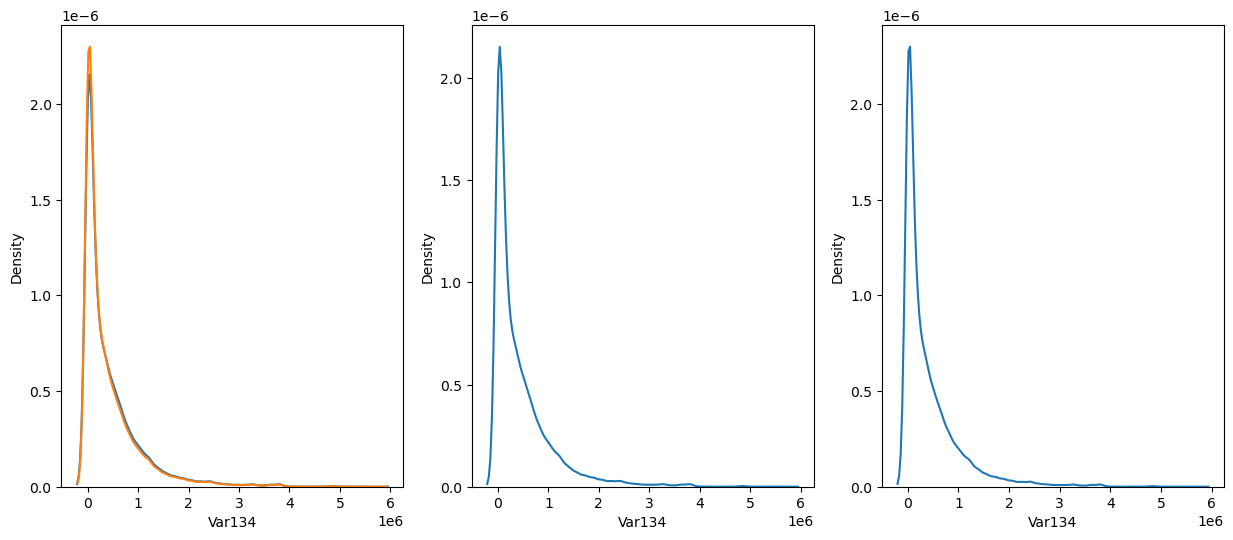

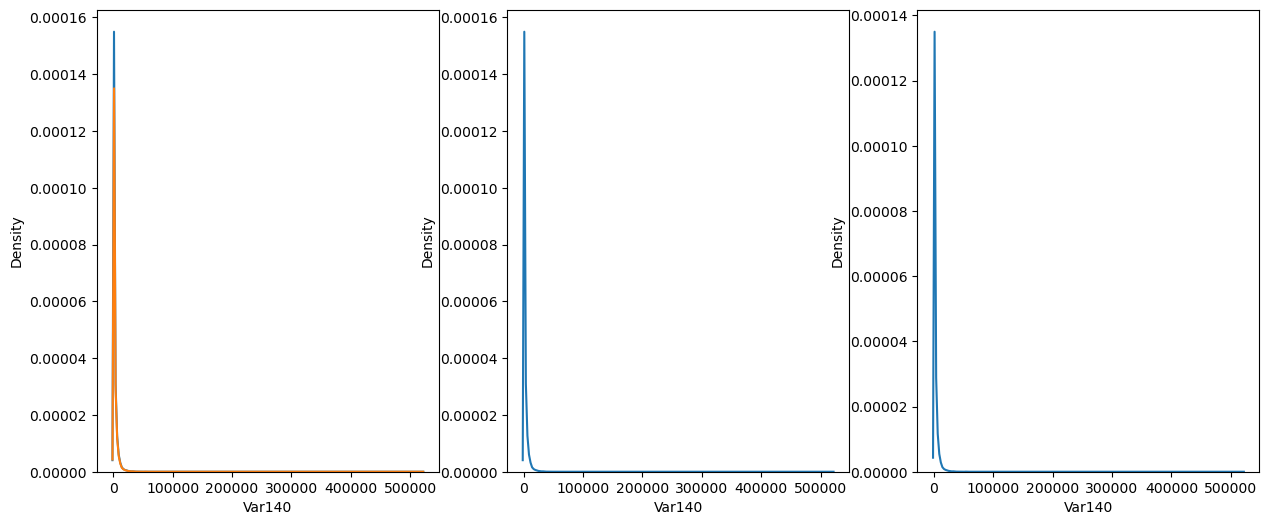

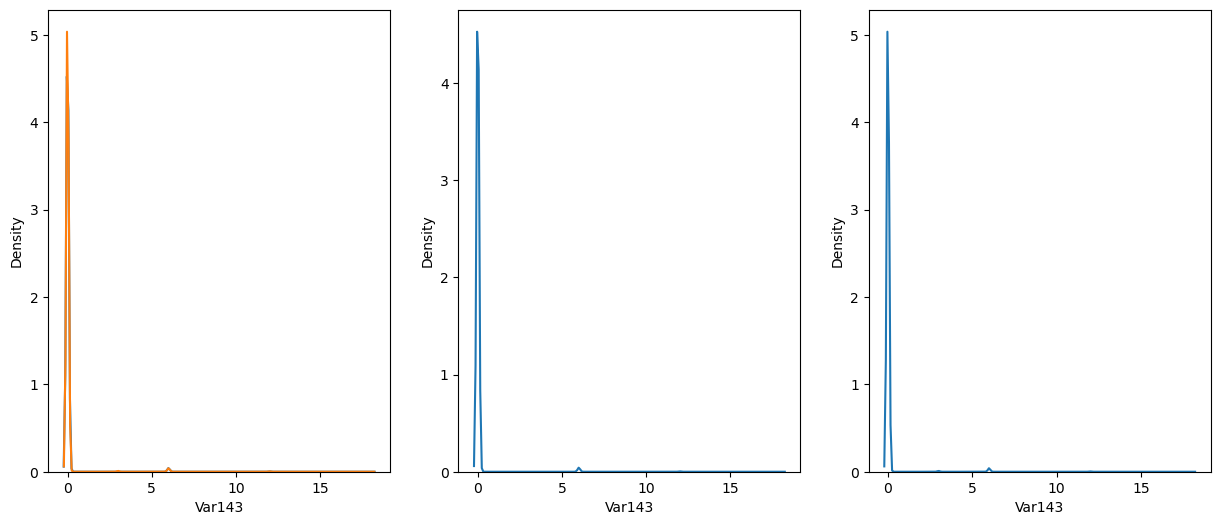

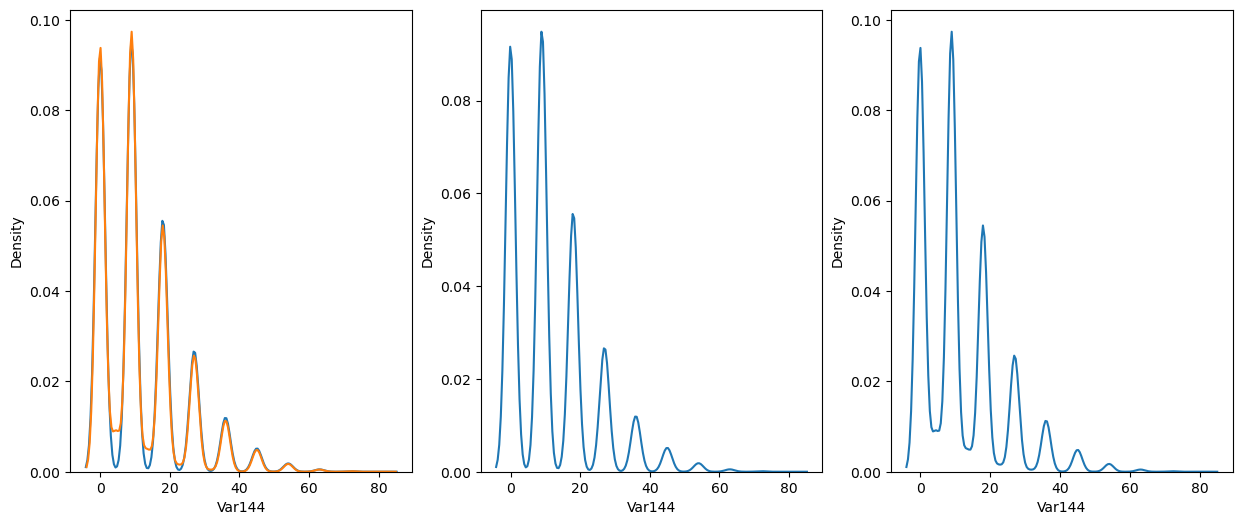

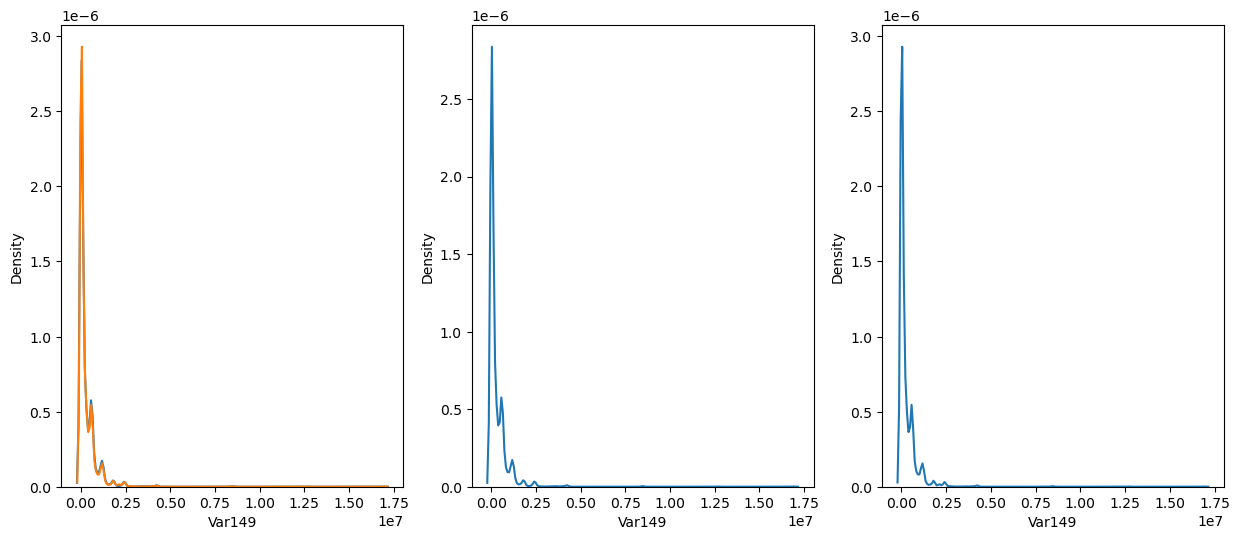

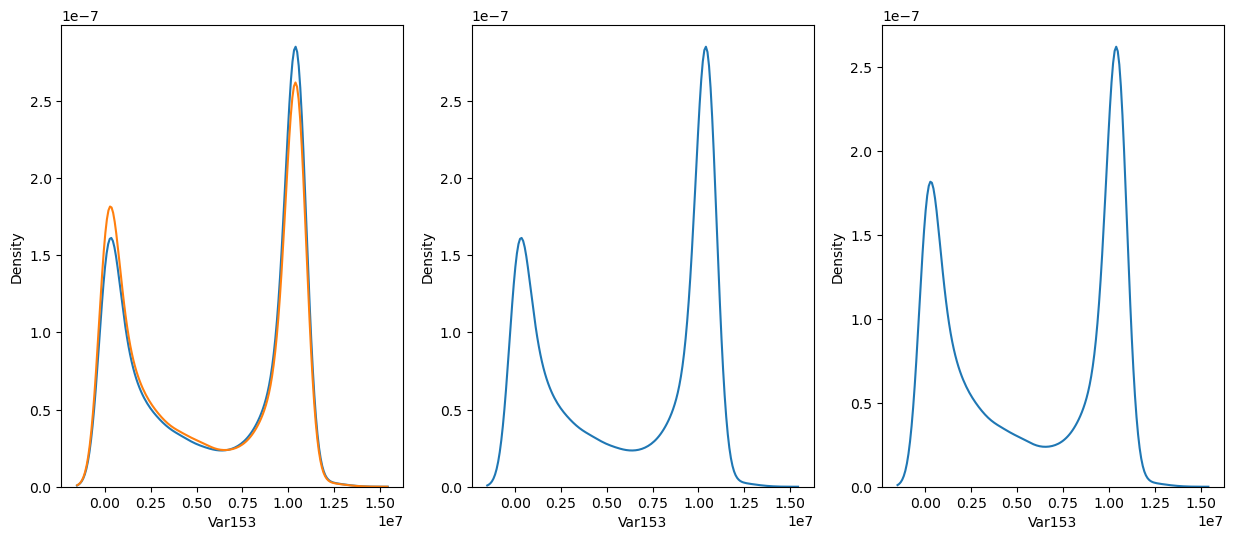

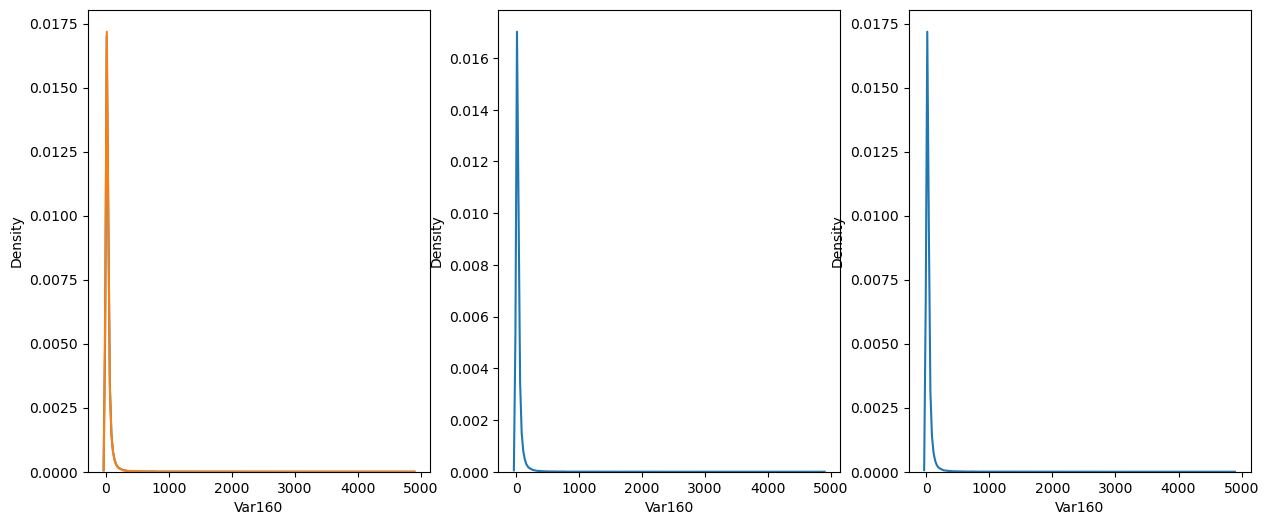

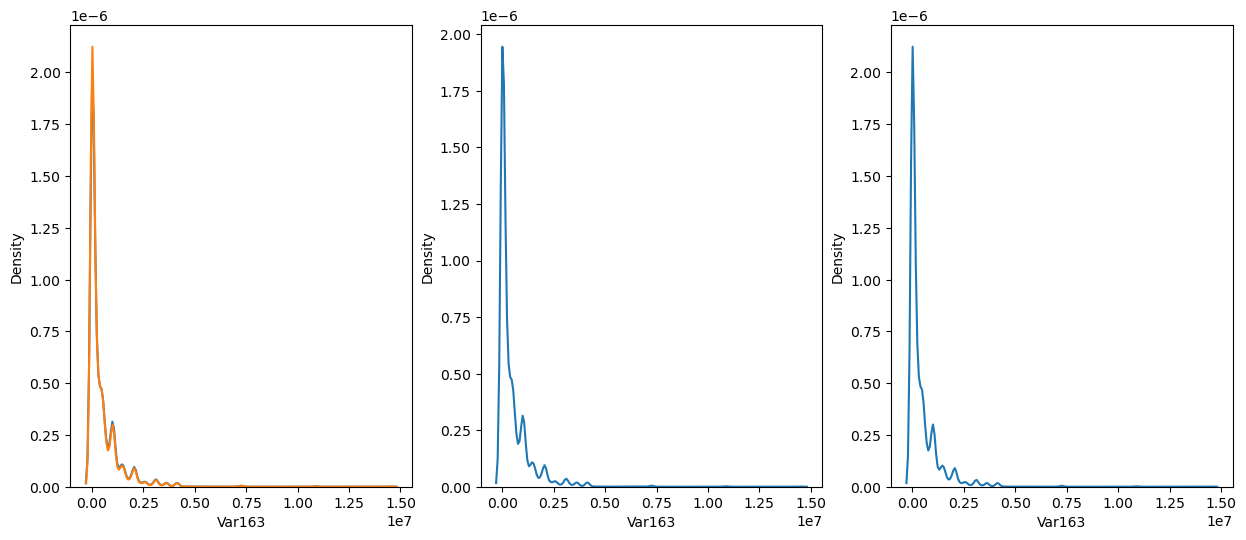

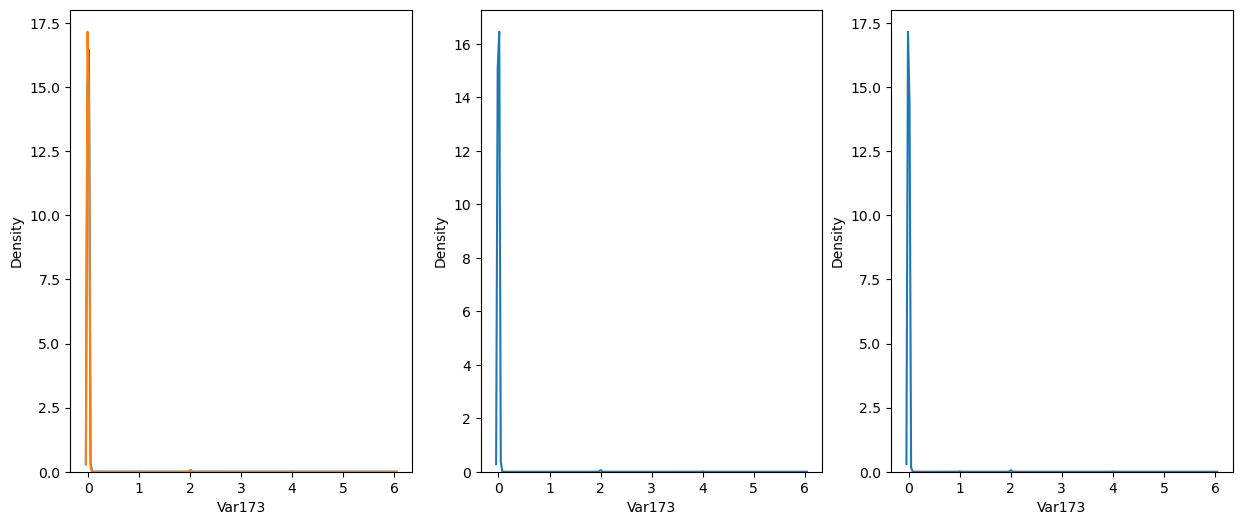

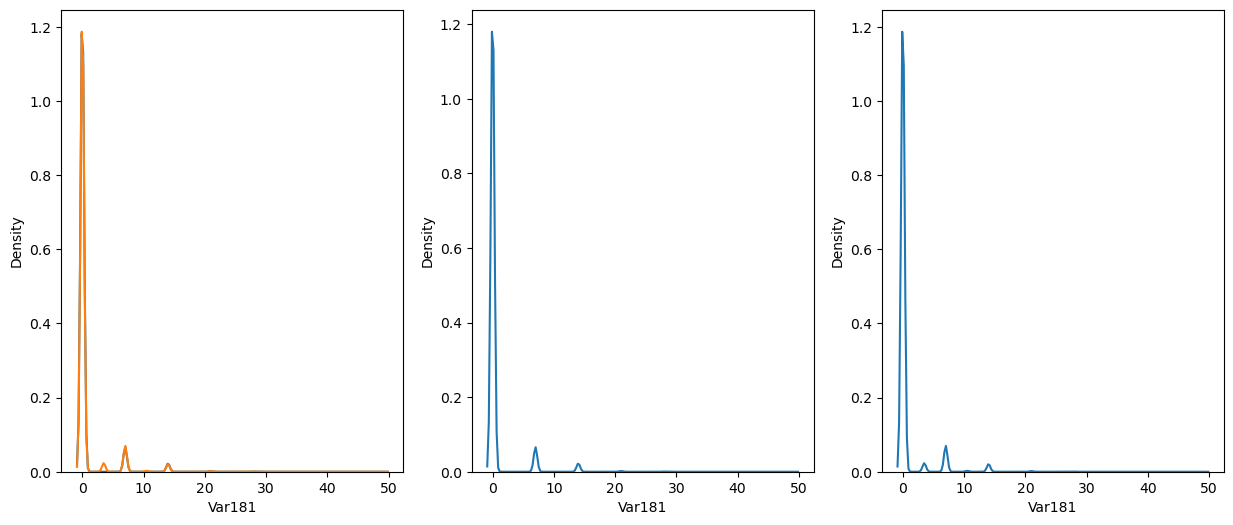

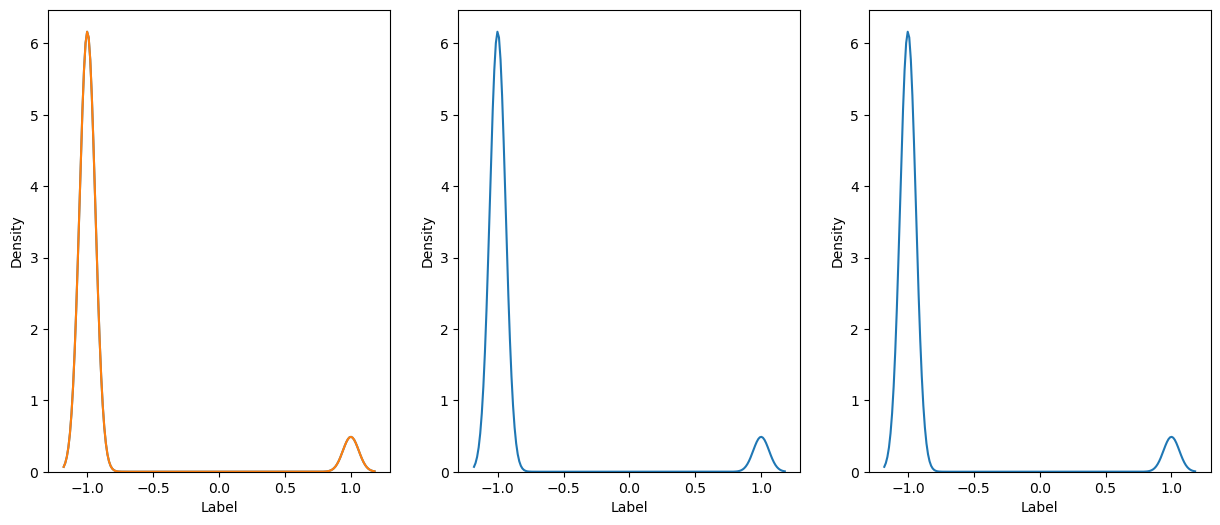

In [50]:
for column in df_missing_data_less_than_50_int:
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize= (15,6))
    sns.kdeplot(df_missing_data_less_than_50_int[column], ax = ax1)
    sns.kdeplot(df_lss_thn_50_int_wot_na[column], ax = ax1)
    sns.kdeplot(df_missing_data_less_than_50_int[column], ax = ax2)
    sns.kdeplot(df_lss_thn_50_int_wot_na[column], ax = ax3)
    plt.show()

* After applying to ML based Imputation, distribution of data remains the same

#### Missing Value imputation for Cateogrical Variable

In [111]:
df_object = df_missing_data_less_than_50.select_dtypes(include=["object"])
df_object_labels = pd.concat([df_object,df_missing_data_less_than_50[['Label']]],axis = 1)
df_object_labels.fillna(value = 'Missing', inplace = True)
df_object.fillna(value = 'Missing', inplace = True)

#### Feature Selection for Categorical Variable

In [59]:
duplicate_features = get_duplicate_features(df_object)

In [60]:
duplicate_features.head()

,Desc,feature1,feature2
0,Duplicate Index,Var198,Var220
1,Duplicate Index,Var198,Var222
2,Duplicate Index,Var220,Var222


In [ ]:
df_object[df_object.Var198 == 'NldASpP'][['Var198','Var220','Var222']].head()

In [ ]:
df_object['Var194'].value_counts()

In [139]:
df_object.drop(['Var220','Var222'], axis = 1, inplace =  True)

In [64]:
df_object_labels.drop(['Var220','Var222'], axis = 1, inplace =  True)

In [38]:
df_object.head()

,Var192,Var193,Var195,Var196,Var197,Var198,Var199,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var226,Var227,Var228
0,bZkvyxLkBI,RO12,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,dXGu,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,XTbPUYD,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,xb3V,RAYp,F2FyR07IdsN7I
1,CEat0G8rTN,RO12,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,lg1t,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,kZJyVg2,NaN,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,fKCe,RAYp,F2FyR07IdsN7I
2,eOQt0GoOh3,AERks4l,taul,1K8T,ffXs,NldASpP,y4g9XoZ,4bTR,9_Y1,MGOA,VpdQ,haYg,DHn_WUyBhW_whjA88g9bvA64_,kIsH,uKAI,L84s,UbxQ8lZ,pMWAe2U,bHR7,UYBR,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,Qu4f,02N6s8f,ib5G6X1eUxUn6
3,jg69tYsGvO,RO12,taul,1K8T,ssAy,_ybO0dd,4hMlgkf58mhwh,W8mQ,9_Y1,YULl,VpdQ,NaN,me75fM6ugJ,kIsH,uKAI,Mtgm,NhsEn4L,kq0dQfu,eKej,UYBR,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I
4,IXSgUHShse,RO12,taul,1K8T,uNkU,EKR938I,ThrHXVS,xklU,9_Y1,RVjC,sJzTlal,6JmL,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,11p4mKe,H3p7,UYBR,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I


In [ ]:
pd.concat([df_object.isna().sum(),df_object.isna().mean(),df_object.nunique()], axis = 1).sort_values(by = [2])
df_object[['Var214','Var200']].dropna().describe()
df_object[['Var214','Var200']].dropna().sort_values(by= 'Var214',  axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

<Axes: >

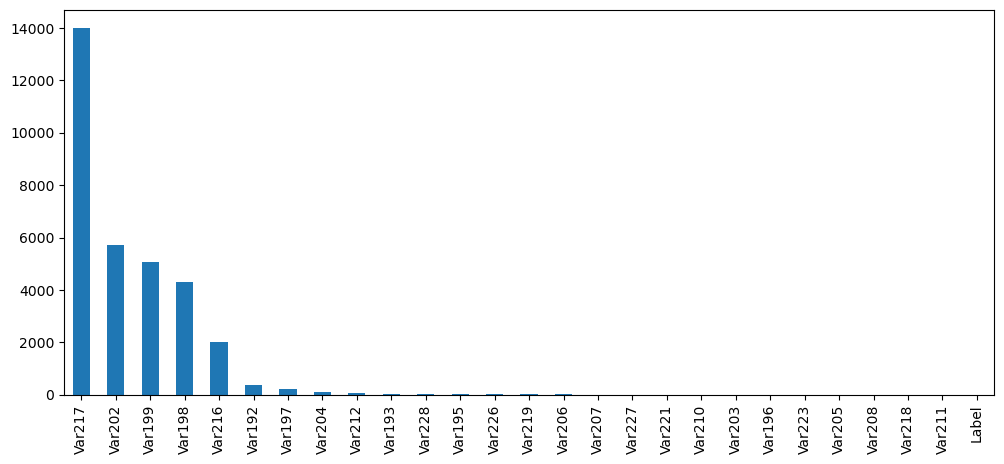

In [70]:
df_object_labels.nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [67]:
pd.concat([df_object_labels.isnull().sum(),df_object_labels.isnull().mean(),df_object_labels.nunique()],axis =1)

,0,1,2
Var192,369,0.01,361
Var193,0,0.00,51
Var195,0,0.00,23
Var196,0,0.00,4
Var197,143,0.00,225
Var198,0,0.00,4291
Var199,4,0.00,5073
Var202,1,0.00,5713
Var203,143,0.00,5
Var204,0,0.00,100


In [68]:
df_object_labels.groupby("Label").apply(lambda x: x.isnull().sum())

,Var192,Var193,Var195,Var196,Var197,Var198,Var199,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var216,Var217,Var218,Var219,Var221,Var223,Var226,Var227,Var228,Label
Label,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,310,0,0,0,137,0,3,1,137,0,1778,5256,0,137,0,0,0,0,514,514,4804,0,4804,0,0,0,0
1,59,0,0,0,6,0,1,0,6,0,156,273,0,6,0,0,0,0,189,189,407,0,407,0,0,0,0


In [73]:
df_object_labels.head()

,Var192,Var193,Var195,Var196,Var197,Var198,Var199,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var216,Var217,Var218,Var219,Var221,Var223,Var226,Var227,Var228,Label
0,bZkvyxLkBI,RO12,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,dXGu,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,XTbPUYD,sH5Z,cJvF,FzaX,oslk,jySVZNlOJy,xb3V,RAYp,F2FyR07IdsN7I,-1
1,CEat0G8rTN,RO12,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,lg1t,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,kZJyVg2,Missing,Missing,FzaX,oslk,LM8l689qOp,fKCe,RAYp,F2FyR07IdsN7I,1
2,eOQt0GoOh3,AERks4l,taul,1K8T,ffXs,NldASpP,y4g9XoZ,4bTR,9_Y1,MGOA,VpdQ,haYg,DHn_WUyBhW_whjA88g9bvA64_,kIsH,uKAI,L84s,UbxQ8lZ,pMWAe2U,bHR7,UYBR,FzaX,Al6ZaUT,jySVZNlOJy,Qu4f,02N6s8f,ib5G6X1eUxUn6,-1
3,jg69tYsGvO,RO12,taul,1K8T,ssAy,_ybO0dd,4hMlgkf58mhwh,W8mQ,9_Y1,YULl,VpdQ,Missing,me75fM6ugJ,kIsH,uKAI,Mtgm,NhsEn4L,kq0dQfu,eKej,UYBR,FzaX,oslk,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I,-1
4,IXSgUHShse,RO12,taul,1K8T,uNkU,EKR938I,ThrHXVS,xklU,9_Y1,RVjC,sJzTlal,6JmL,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,11p4mKe,H3p7,UYBR,FzaX,oslk,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I,-1


In [87]:
chi_squr_col_lst_ovr_300_cat = df_object_labels.nunique()[df_object_labels.nunique()<300].index[:-1]

In [78]:
chi_squr_col_lst

Index(['Var195', 'Var196', 'Var203', 'Var205', 'Var206', 'Var207', 'Var208',
       'Var210', 'Var211', 'Var218', 'Var219', 'Var221', 'Var223', 'Var226',
       'Var227', 'Var228'],
      dtype='object')

In [79]:
import scipy.stats as ss

In [91]:
chi_squr_col_lst_ovr_300_cat

Index(['Var193', 'Var195', 'Var196', 'Var197', 'Var203', 'Var204', 'Var205',
       'Var206', 'Var207', 'Var208', 'Var210', 'Var211', 'Var212', 'Var218',
       'Var219', 'Var221', 'Var223', 'Var226', 'Var227', 'Var228'],
      dtype='object')

In [94]:
result_ovr_300_cat = []
for i in chi_squr_col_lst_ovr_300_cat:
    result_ovr_300_cat.append((i,'Label',list(ss.chi2_contingency(pd.crosstab(
                                df_object_labels[i], df_object_labels['Label'])))[1]))
chi_sqr_df = pd.DataFrame(result_ovr_300_cat,columns= ['Indep-Var','Dependent-Var','P-Value'])

In [95]:
chi_sqr_df.head(20)

,Indep-Var,Dependent-Var,P-Value
0,Var193,Label,0.00
1,Var195,Label,0.00
2,Var196,Label,0.15
3,Var197,Label,0.00
4,Var203,Label,0.06
5,Var204,Label,0.00
6,Var205,Label,0.00
7,Var206,Label,0.00
8,Var207,Label,0.00
9,Var208,Label,0.08


In [96]:
chi_sqr_df[chi_sqr_df['P-Value']>0.05]

,Indep-Var,Dependent-Var,P-Value
2,Var196,Label,0.15
4,Var203,Label,0.06
9,Var208,Label,0.08
14,Var219,Label,0.13
16,Var223,Label,0.34


#### Feature Selection for Numberical Variable

In [54]:
df_missing_data_less_than_50_int.corr()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Label
Var6,1.00,0.15,0.09,0.58,0.58,0.42,0.51,-0.02,-0.01,0.02,0.01,-0.00,0.10,0.07,0.13,0.02,0.02,-0.01,-0.20,0.49,0.46,0.02,0.50,0.51,0.02,0.75,0.52,0.02,0.06,-0.01,0.02,0.02,0.06,-0.01,0.09,0.00,0.04,0.50,0.02,-0.00,-0.02,-0.02
Var7,0.15,1.00,0.41,0.06,0.07,0.07,0.08,-0.02,-0.01,0.02,-0.01,-0.00,0.65,0.64,0.49,0.13,0.03,0.01,-0.14,0.03,0.08,0.06,0.06,0.08,0.03,0.07,0.04,0.09,0.10,-0.02,0.04,0.04,0.27,-0.01,0.32,-0.00,0.05,0.06,0.02,-0.00,-0.05,-0.07
Var13,0.09,0.41,1.00,0.05,0.05,0.03,0.05,0.00,0.01,0.01,-0.01,0.01,0.33,0.23,0.41,0.17,0.03,-0.00,-0.06,0.03,0.04,0.08,0.04,0.04,0.01,0.05,0.04,0.08,0.05,-0.00,0.04,0.03,0.25,0.00,0.29,0.01,0.04,0.05,0.02,0.00,-0.02,-0.04
Var21,0.58,0.06,0.05,1.00,1.00,0.67,0.89,-0.01,0.03,0.02,0.01,0.00,0.06,0.04,0.05,0.02,0.00,-0.00,-0.15,0.80,0.76,0.01,0.80,0.83,0.01,0.76,0.89,0.00,0.03,0.01,0.01,0.01,0.03,-0.00,0.02,-0.01,0.02,0.93,0.01,-0.00,-0.01,-0.01
Var22,0.58,0.07,0.05,1.00,1.00,0.67,0.89,-0.00,0.03,0.02,0.01,0.00,0.06,0.04,0.06,0.02,0.01,-0.00,-0.15,0.80,0.76,0.02,0.80,0.83,0.01,0.76,0.89,0.00,0.03,0.01,0.01,0.02,0.03,-0.00,0.02,-0.01,0.02,0.93,0.01,-0.00,-0.01,-0.01
Var24,0.42,0.07,0.03,0.67,0.67,1.00,0.66,-0.07,0.01,-0.12,-0.01,-0.00,0.05,0.04,0.07,0.01,-0.05,-0.01,-0.24,0.46,0.74,0.02,0.77,0.72,-0.05,0.51,0.50,0.01,0.06,0.00,-0.08,-0.04,0.03,-0.00,-0.00,0.08,-0.14,0.58,-0.01,0.00,0.00,-0.01
Var25,0.51,0.08,0.05,0.89,0.89,0.66,1.00,-0.04,0.03,-0.08,0.00,0.00,0.06,0.05,0.07,0.02,-0.05,-0.00,-0.22,0.62,0.75,0.01,0.69,0.71,-0.02,0.68,0.71,0.00,0.06,0.01,-0.08,0.06,0.04,-0.00,0.00,-0.01,-0.08,0.79,0.04,-0.00,-0.01,-0.01
Var28,-0.02,-0.02,0.00,-0.01,-0.00,-0.07,-0.04,1.00,0.08,0.27,-0.02,0.01,0.02,0.00,-0.08,0.00,0.17,-0.00,0.24,0.04,-0.04,0.06,-0.02,-0.03,0.14,-0.01,0.05,-0.01,-0.11,0.04,0.21,0.16,0.02,0.04,0.08,0.06,0.37,-0.01,0.12,-0.01,-0.01,0.02
Var35,-0.01,-0.01,0.01,0.03,0.03,0.01,0.03,0.08,1.00,0.06,0.13,0.00,0.00,0.01,-0.03,0.00,0.01,0.15,0.04,0.03,0.03,0.02,0.02,0.02,-0.02,0.01,0.03,0.00,-0.06,0.61,0.02,0.02,0.02,0.09,0.02,0.00,0.06,0.03,0.02,0.05,0.07,0.01
Var38,0.02,0.02,0.01,0.02,0.02,-0.12,-0.08,0.27,0.06,1.00,0.01,-0.00,0.05,0.03,-0.07,0.00,0.05,-0.01,0.38,0.12,-0.07,0.04,-0.02,-0.06,0.28,0.03,0.16,-0.01,-0.11,-0.00,0.08,0.09,0.02,0.01,0.11,-0.03,0.69,-0.03,0.07,-0.00,-0.08,0.01


<Axes: >

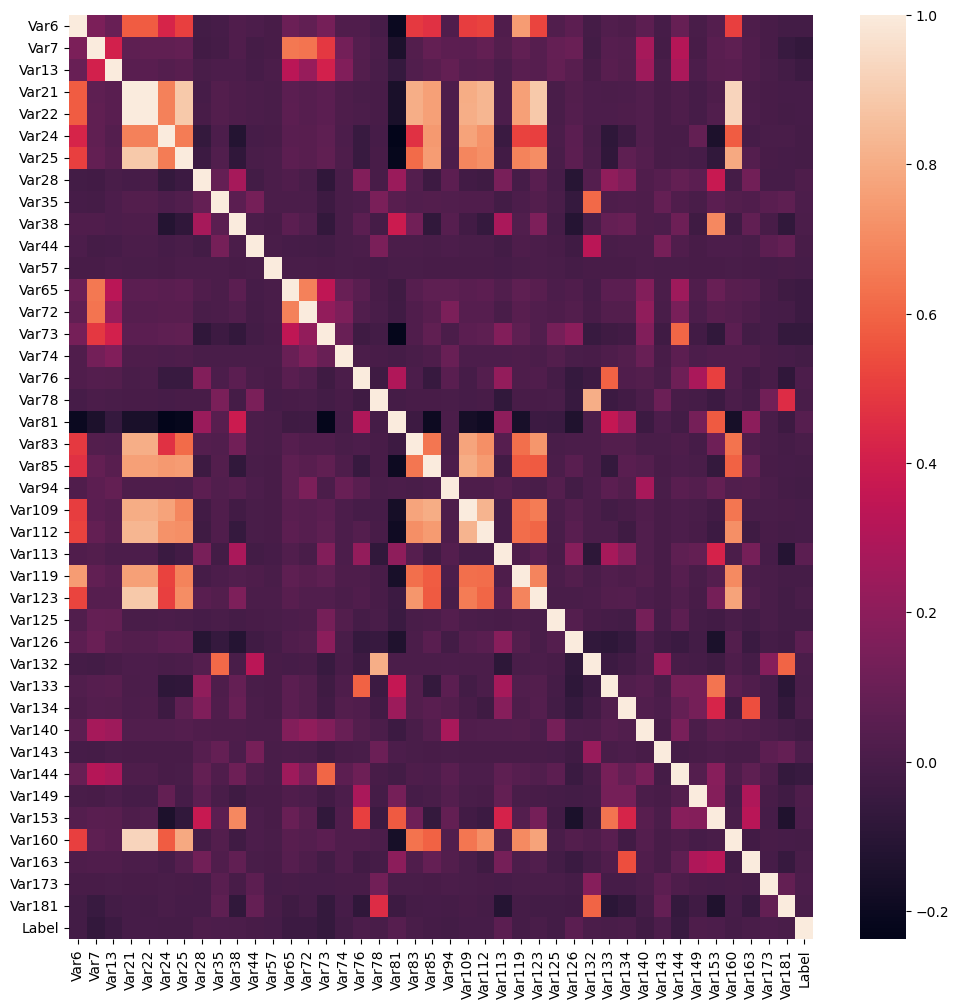

In [61]:
figsize, ax = plt.subplots(1,1,figsize = (12,12))
sns.heatmap(df_missing_data_less_than_50_int.corr(), ax= ax)

In [81]:
corr = df_missing_data_less_than_50_int.corr()
corr = corr[((corr>0.75)&(corr<=1)) | (corr< -0.75)&(corr>=-1)].dropna(how='all', axis=1)
upper_corr_mat = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
corr_mat_pair = upper_corr_mat.unstack().dropna().reset_index()

In [93]:
corr_mat_pair

,level_0,level_1,0
0,Var22,Var21,1.00
1,Var25,Var21,0.89
2,Var25,Var22,0.89
3,Var83,Var21,0.80
4,Var83,Var22,0.80
5,Var85,Var21,0.76
6,Var85,Var22,0.76
7,Var85,Var25,0.75
8,Var109,Var21,0.80
9,Var109,Var22,0.80


In [94]:
corr_mat_pair['level_0'].unique()

array(['Var22', 'Var25', 'Var83', 'Var85', 'Var109', 'Var112', 'Var119',
       'Var123', 'Var132', 'Var160'], dtype=object)

In [101]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
def calculate_vif(X):
    X = sm.add_constant(X) # intercept, regression line to fit better to the data 

    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [103]:
vif_result = calculate_vif(df_lss_thn_50_int_wot_na)

print(vif_result)

# Check for multicollinearity
for index, row in vif_result.iterrows():
    if row['VIF'] >= 10:
        print(f"Multicollinearity detected in {row['feature']} with VIF: {row['VIF']}")

   feature    VIF
0    const  19.68
1     Var6   2.44
2     Var7   2.35
3    Var13   1.35
4    Var21 219.58
5    Var22    inf
6    Var24   3.81
7    Var25    inf
8    Var28   1.19
9    Var35    inf
10   Var38  15.17
11   Var44    inf
12   Var57   1.00
13   Var65   1.97
14   Var72   1.55
15   Var73   2.00
16   Var74   1.04
17   Var76   3.26
18   Var78    inf
19   Var81   1.75
20   Var83    inf
21   Var85    inf
22   Var94   1.11
23  Var109   6.43
24  Var112    inf
25  Var113   1.43
26  Var119   3.70
27  Var123    inf
28  Var125   1.04
29  Var126   1.07
30  Var132    inf
31  Var133   9.88
32  Var134   4.48
33  Var140   1.20
34  Var143    inf
35  Var144   1.65
36  Var149   1.27
37  Var153  42.48
38  Var160    inf
39  Var163   2.21
40  Var173    inf
41  Var181    inf
42   Label   1.01
Multicollinearity detected in const with VIF: 19.67836679996771
Multicollinearity detected in Var21 with VIF: 219.57525608529784
Multicollinearity detected in Var22 with VIF: inf
Multicollinearity detected in

* Action taken based on Feature Selection

In [106]:
df_lss_thn_50_int_wot_na.drop(['Var22', 'Var25', 'Var83', 'Var85', 'Var109', 'Var112', 'Var119',
       'Var123', 'Var132', 'Var160'], axis = 1, inplace = True)

In [107]:
df_lss_thn_50_int_wot_na.columns

Index(['Var6', 'Var7', 'Var13', 'Var21', 'Var24', 'Var28', 'Var35', 'Var38',
       'Var44', 'Var57', 'Var65', 'Var72', 'Var73', 'Var74', 'Var76', 'Var78',
       'Var81', 'Var94', 'Var113', 'Var125', 'Var126', 'Var133', 'Var134',
       'Var140', 'Var143', 'Var144', 'Var149', 'Var153', 'Var163', 'Var173',
       'Var181', 'Label'],
      dtype='object')

In [113]:
df_object_labels.drop(['Var196', 'Var203', 'Var208', 'Var219', 'Var223'],axis = 1,inplace = True)

In [114]:
df_object_labels.columns

Index(['Var192', 'Var193', 'Var195', 'Var197', 'Var198', 'Var199', 'Var202',
       'Var204', 'Var205', 'Var206', 'Var207', 'Var210', 'Var211', 'Var212',
       'Var216', 'Var217', 'Var218', 'Var220', 'Var221', 'Var222', 'Var226',
       'Var227', 'Var228', 'Label'],
      dtype='object')

In [141]:
df_object.drop(['Var196', 'Var203', 'Var208', 'Var219', 'Var223'],axis = 1,inplace = True)

In [131]:
df_object.columns

Index(['Var192', 'Var193', 'Var195', 'Var197', 'Var198', 'Var199', 'Var202',
       'Var204', 'Var205', 'Var206', 'Var207', 'Var210', 'Var211', 'Var212',
       'Var216', 'Var217', 'Var218', 'Var220', 'Var221', 'Var222', 'Var226',
       'Var227', 'Var228'],
      dtype='object')

### Feature Encoding

#### Feature Encoding for Categorical Variable

In [128]:
print(df_object_labels.nunique().sort_values(ascending=False)[:7].index)

Index(['Var217', 'Var202', 'Var199', 'Var220', 'Var222', 'Var198', 'Var216'], dtype='object')


<Axes: >

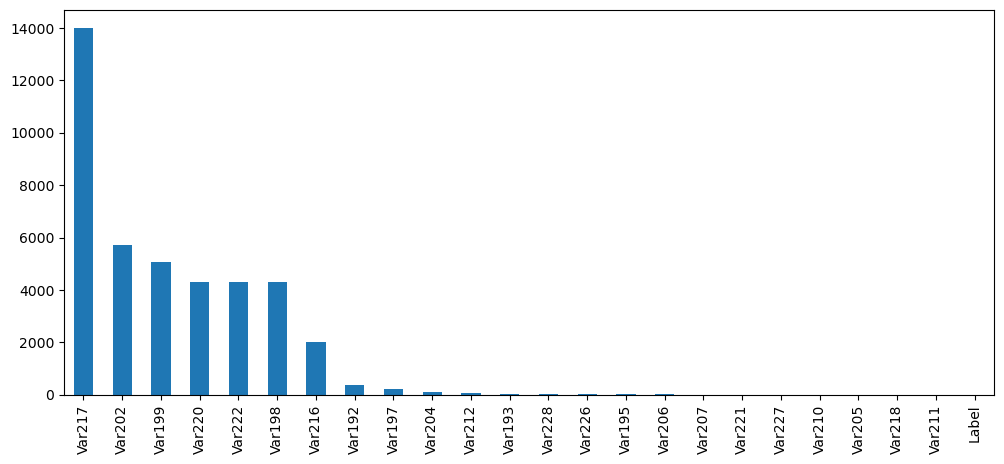

In [115]:
df_object_labels.nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [ ]:
label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(df_object_labels.loc[:, ['Var217', 'Var202', 'Var199', 'Var220', 'Var222', 'Var198', 'Var216']])

<Axes: >

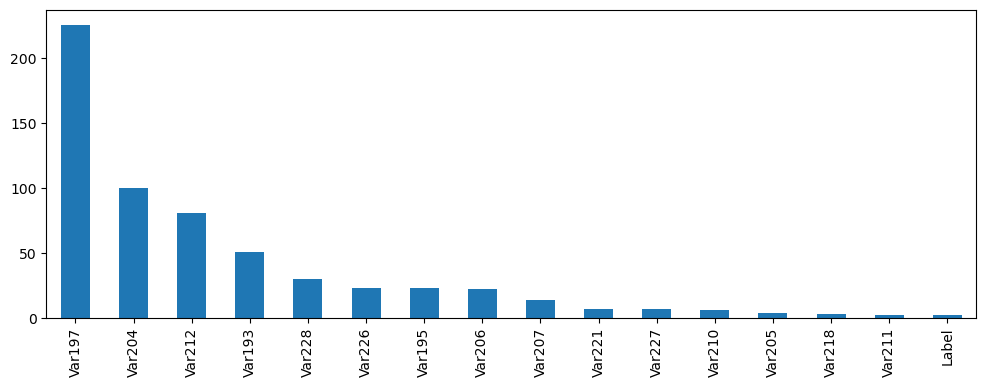

In [119]:
df_object_labels.nunique().sort_values(ascending=False)[8:].plot.bar(figsize=(12,4))

<Axes: >

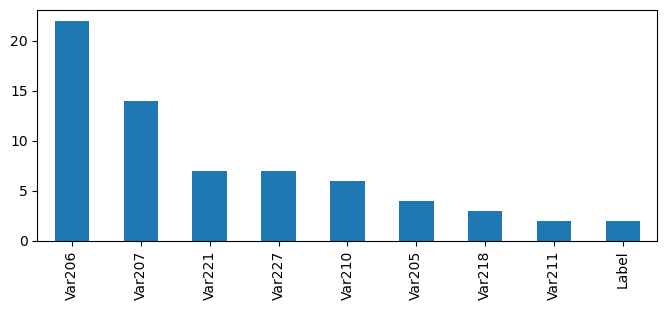

In [123]:
df_object_labels.nunique().sort_values(ascending=False)[15:].plot.bar(figsize=(8,3))

In [142]:
df_object.columns

Index(['Var192', 'Var193', 'Var195', 'Var197', 'Var198', 'Var199', 'Var202',
       'Var204', 'Var205', 'Var206', 'Var207', 'Var210', 'Var211', 'Var212',
       'Var216', 'Var217', 'Var218', 'Var221', 'Var226', 'Var227', 'Var228'],
      dtype='object')

In [145]:
set(df_object_labels.columns) - set(df_object.columns)

{'Label', 'Var220', 'Var222'}

In [146]:
encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1)
cat_var_ordnl_encde = encoder.fit_transform(df_object)

In [137]:
cat_var_ordnl_encde

array([[225.,  25.,  22., ...,  22.,   2.,   8.],
       [ 91.,  25.,  22., ...,  14.,   2.,   8.],
       [248.,   5.,  22., ...,  10.,   0.,  25.],
       ...,
       [326.,   0.,  22., ...,  14.,   2.,  14.],
       [115.,  25.,  22., ...,   7.,   2.,   8.],
       [225.,  25.,  22., ...,  22.,   2.,   8.]])

In [147]:
df_cat_var_ordnl_encde =  pd.DataFrame(cat_var_ordnl_encde, columns = df_object.columns)

In [148]:
df_cat_var_ordnl_encde.head()

,Var192,Var193,Var195,Var197,Var198,Var199,Var202,Var204,Var205,Var206,Var207,Var210,Var211,Var212,Var216,Var217,Var218,Var221,Var226,Var227,Var228
0,226.00,25.00,22.00,178.00,3302.00,4016.00,3683.00,28.00,2.00,12.00,10.00,5.00,0.00,44.00,788.00,12237.00,2.00,4.00,22.00,2.00,8.00
1,91.00,25.00,22.00,13.00,3697.00,4891.00,4423.00,79.00,3.00,21.00,10.00,5.00,0.00,33.00,1317.00,5013.00,0.00,4.00,14.00,2.00,8.00
2,249.00,5.00,22.00,158.00,1686.00,4901.00,448.00,37.00,2.00,12.00,5.00,5.00,0.00,42.00,1612.00,8474.00,1.00,0.00,10.00,0.00,25.00
3,270.00,25.00,22.00,203.00,2575.00,362.00,2954.00,57.00,2.00,7.00,10.00,5.00,1.00,33.00,1425.00,9162.00,1.00,4.00,7.00,2.00,8.00
4,131.00,25.00,22.00,209.00,971.00,2400.00,5512.00,43.00,3.00,3.00,10.00,5.00,0.00,44.00,6.00,3834.00,1.00,4.00,7.00,2.00,8.00


In [149]:
df_cat_var_ordnl_encde.shape

(50000, 21)

In [150]:
df_lss_thn_50_int_wot_na.shape

(50000, 32)

In [151]:
df_final_data = pd.concat([df_lss_thn_50_int_wot_na,df_cat_var_ordnl_encde], axis = 1)

In [152]:
df_final_data.to_csv('df_final_data.csv')